# Import Library

In [150]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_percentage_error
# import optuna
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

## Load Training Dataset

In [228]:
train_dataset_path = './warmup-datavidia/train.csv'
train_dataset = pd.read_csv(train_dataset_path)

## Load Test Dataset

In [6]:
test_dataset_path = './warmup-datavidia/test.csv'
test_dataset = pd.read_csv(test_dataset_path)

# Exploration Data Analysis (Training)

## List All Features

In [7]:
train_dataset.columns

Index(['Unnamed: 0', 'Negara/Tahun', 'Emisi Savanna Api',
       'Emisi Kebakaran Hutan', 'Emisi Residu Tanaman', 'Emisi Budidaya Padi',
       'Emisi Tanah Organik Yang Dikeringkan (Co2)',
       'Emisi Pembuatan Pestisida', 'Emisi Transportasi Makanan',
       'Lahan Hutan', 'Konversi Hutan Bersih',
       'Emisi Konsumsi Rumah Tangga Makanan', 'Emisi Ritel Makanan',
       'Emisi Penggunaan Listrik Di Pertanian', 'Emisi Kemasan Makanan',
       'Emisi Sistem Agrifood Pembuangan Limbah', 'Emisi Pengolahan Makanan',
       'Emisi Manufaktur Pupuk', 'Emisi IPPU',
       'Emisi Kotoran Diterapkan Pada Tanah',
       'Emisi Pupuk Kandang Di Padang Rumput', 'Emisi Manajemen Pupuk',
       'Emisi Kebakaran Di Tanah Organik',
       'Emisi Kebakaran Di Hutan Tropis Yang Lembab',
       'Penggunaan Energi Di Pertanian', 'Populasi Pedesaan',
       'Populasi Perkotaan', 'Total Populasi - Pria',
       'Total Populasi - Wanita', 'Emisi Total',
       'Peningkatan Suhu Rata - Rata ° C'],
      

## Display Data

In [8]:
train_dataset.head(30)

Unnamed: 0      Negara/Tahun  Emisi Savanna Api  Emisi Kebakaran Hutan  \
0            0  Afghanistan/1990            14.7237                 0.0557   
1            1  Afghanistan/1991            14.7237                 0.0557   
2            2  Afghanistan/1992            14.7237                 0.0557   
3            3  Afghanistan/1993            14.7237                 0.0557   
4            4  Afghanistan/1994            14.7237                 0.0557   
5            5  Afghanistan/1995            14.7237                 0.0557   
6            6  Afghanistan/1996            38.9302                 0.2014   
7            7  Afghanistan/1997            30.9378                 0.1193   
8            8  Afghanistan/1998            64.1411                 0.3263   
9            9  Afghanistan/1999            46.1683                 0.0895   
10          10  Afghanistan/2000            22.7810                 0.7111   
11          11  Afghanistan/2001             0.2219                 0.0000   
12          12  Afghanistan/2002             9.0562                 0.0000   
13          13  Afghanistan/2003            55.8052                 0.0000   
14          14  Afghanistan/2004            11.9759                 0.0000   
15          15  Afghanistan/2005             5.3259                 0.0000   
16          16  Afghanistan/2006             4.4081                 0.0000   
17          17  Afghanistan/2007             2.8238                 0.0000   
18          18  Afghanistan/2008            27.7623                 0.0000   
19          19  Afghanistan/2009             2.6183                 0.0000   
20          20  Afghanistan/2010            24.8111                 0.0000   
21          21  Afghanistan/2011             1.8412                 0.0000   
22          22  Afghanistan/2012             2.8955                 0.0000   
23          23  Afghanistan/2013             3.1595                 0.0000   
24          24  Afghanistan/2014             2.6796                 0.0000   
25          25      Albania/1990             5.5561                 7.0253   
26          26      Albania/1991             5.5561                 7.0253   
27          27      Albania/1992             5.5561                 7.0253   
28          28      Albania/1993             5.5561                 7.0253   
29          29      Albania/1994             5.5561                 7.0253   

    Emisi Residu Tanaman  Emisi Budidaya Padi  \
0               205.6077             686.0000   
1               209.4971             678.1600   
2               196.5341             686.0000   
3               230.8175             686.0000   
4               242.0494             705.6000   
5               243.8152             666.4000   
6               249.0364             686.0000   
7               276.2940             705.6000   
8               287.4346             705.6000   
9               247.4980             548.8000   
10              168.8070             509.6000   
11              170.9884             474.3200   
12              266.1975             529.2000   
13              324.2195             568.4000   
14              266.9995             764.4000   
15              383.7498             627.2000   
16              333.6093             627.2000   
17              403.3749             666.4000   
18              287.9099             744.8000   
19              451.8647             784.0000   
20              413.6467             815.3600   
21              335.0379             823.2000   
22              445.5958             803.6000   
23              455.0727             803.6000   
24              473.4174             862.4000   
25               59.2391              23.5200   
26               31.4625               6.2720   
27               29.9373               1.8816   
28               44.0550               1.0976   
29               42.4253               0.0000   

    Emisi Tanah Organik Yang Dikeringkan (Co2)  Emisi Pembuatan P

## Check null data

In [9]:
train_dataset.isnull().sum()

Unnamed: 0                                        0
Negara/Tahun                                      0
Emisi Savanna Api                                25
Emisi Kebakaran Hutan                            75
Emisi Residu Tanaman                           1118
Emisi Budidaya Padi                               0
Emisi Tanah Organik Yang Dikeringkan (Co2)        0
Emisi Pembuatan Pestisida                         0
Emisi Transportasi Makanan                        0
Lahan Hutan                                     397
Konversi Hutan Bersih                           397
Emisi Konsumsi Rumah Tangga Makanan             389
Emisi Ritel Makanan                               0
Emisi Penggunaan Listrik Di Pertanian             0
Emisi Kemasan Makanan                             0
Emisi Sistem Agrifood Pembuangan Limbah           0
Emisi Pengolahan Makanan                          0
Emisi Manufaktur Pupuk                            0
Emisi IPPU                                      599
Emisi Kotora

## Info Dataset

In [10]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   5603 non-null   int64  
 1   Negara/Tahun                                 5603 non-null   object 
 2   Emisi Savanna Api                            5578 non-null   float64
 3   Emisi Kebakaran Hutan                        5528 non-null   float64
 4   Emisi Residu Tanaman                         4485 non-null   float64
 5   Emisi Budidaya Padi                          5603 non-null   float64
 6   Emisi Tanah Organik Yang Dikeringkan (Co2)   5603 non-null   float64
 7   Emisi Pembuatan Pestisida                    5603 non-null   float64
 8   Emisi Transportasi Makanan                   5603 non-null   float64
 9   Lahan Hutan                                  5206 non-null   float64
 10  

## Describe Dataset

In [11]:
train_dataset.describe()

Unnamed: 0  Emisi Savanna Api  Emisi Kebakaran Hutan  \
count  5603.00000        5578.000000            5528.000000   
mean   2801.00000        1229.654445             924.275199   
std    1617.59111        5472.353828            3692.584881   
min       0.00000           0.000000               0.000000   
25%    1400.50000           0.000000               0.000000   
50%    2801.00000           1.657900               0.661850   
75%    4201.50000         114.309200              71.094900   
max    5602.00000      114616.401100           52227.630600   

       Emisi Residu Tanaman  Emisi Budidaya Padi  \
count           4485.000000          5603.000000   
mean             949.205076          4241.101704   
std             3498.477164         17599.627763   
min                0.000200             0.000000   
25%               10.921100           172.219300   
50%               98.037400           515.517200   
75%              356.216100          1551.410550   
max            30638.533800        164915.255600   

       Emisi Tanah Organik Yang Dikeringkan (Co2)  Emisi Pembuatan Pestisida  \
count                                 5603.000000                5603.000000   
mean                                  3471.791570                 327.522289   
std                                  15488.661938                1445.484865   
min                                      0.000000                   0.000000   
25%                                      0.000000                   5.000000   
50%                                      0.000000                  12.328281   
75%                                    694.164500                 106.981731   
max                                 232118.469400               16459.000000   

       Emisi Transportasi Makanan    Lahan Hutan  Konversi Hutan Bersih  ...  \
count                 5603.000000    5206.000000           5.206000e+03  ...   
mean                  1823.138303  -18145.654062           1.845452e+04  ...   
std                   5306.417931   81045.735821           1.080050e+05  ...   
min                      0.000100 -797183.079000           0.000000e+00  ...   
25%                     26.262663   -3224.371500           0.000000e+00  ...   
50%                    176.065300     -69.534600           4.461600e+01  ...   
75%                   1135.649750       0.000000           4.734968e+03  ...   
max                  62048.167300  171121.076000           1.605106e+06  ...   

       Emisi Manajemen Pupuk  Emisi Kebakaran Di Tanah Organik  \
count            4851.000000                       5603.000000   
mean             2252.800520                       1254.336085   
std              8010.868244                      23189.667834   
min                 0.432900                          0.000000   
25%                36.865800                          0.000000   
50%               255.461900                          0.000000   
75%              1121.881500                          0.000000   
max             70592.646500                     991717.543100   

       Emisi Kebakaran Di Hutan Tropis Yang Lembab  \
count                                  5478.000000   
mean                                    668.283943   
std                                    3243.015188   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                      10.189775   
max                                   51771.256800   

       Penggunaan Energi Di Pertanian  Populasi Pedesaan  Populasi Perkotaan  \
count                     4821.000000       5.603000e+03        5.603000e+03   
mean                      3015.805047       1.794903e+07        1.573881e+07   
std                      12391.323706       9.073657e+07        5.920313e+07   
min                          0.031900       0.000000e+00        0.000000e+00   
25%                         12.181500       9.

# Exploration Data Analysis (Testing)

## List All Features

In [12]:
test_dataset.columns

Index(['Unnamed: 0', 'Negara/Tahun', 'Emisi Savanna Api',
       'Emisi Kebakaran Hutan', 'Emisi Residu Tanaman', 'Emisi Budidaya Padi',
       'Emisi Tanah Organik Yang Dikeringkan (Co2)',
       'Emisi Pembuatan Pestisida', 'Emisi Transportasi Makanan',
       'Lahan Hutan', 'Konversi Hutan Bersih',
       'Emisi Konsumsi Rumah Tangga Makanan', 'Emisi Ritel Makanan',
       'Emisi Penggunaan Listrik Di Pertanian', 'Emisi Kemasan Makanan',
       'Emisi Sistem Agrifood Pembuangan Limbah', 'Emisi Pengolahan Makanan',
       'Emisi Manufaktur Pupuk', 'Emisi IPPU',
       'Emisi Kotoran Diterapkan Pada Tanah',
       'Emisi Pupuk Kandang Di Padang Rumput', 'Emisi Manajemen Pupuk',
       'Emisi Kebakaran Di Tanah Organik',
       'Emisi Kebakaran Di Hutan Tropis Yang Lembab',
       'Penggunaan Energi Di Pertanian', 'Populasi Pedesaan',
       'Populasi Perkotaan', 'Total Populasi - Pria',
       'Total Populasi - Wanita', 'Emisi Total'],
      dtype='object')

## Display Data

In [13]:
test_dataset.head(5)

Unnamed: 0      Negara/Tahun  Emisi Savanna Api  Emisi Kebakaran Hutan  \
0           0  Afghanistan/2015             0.8454                    0.0   
1           1  Afghanistan/2016             1.6558                    0.0   
2           2  Afghanistan/2017             0.4015                    0.0   
3           3  Afghanistan/2018             0.2008                    0.0   
4           4  Afghanistan/2019             7.1050                    0.0   

   Emisi Residu Tanaman  Emisi Budidaya Padi  \
0              403.3181             642.8800   
1              387.6130             466.4800   
2              344.6447             429.0518   
3              291.7838             460.7529   
4              395.2689             499.9176   

   Emisi Tanah Organik Yang Dikeringkan (Co2)  Emisi Pembuatan Pestisida  \
0                                         0.0                  81.852555   
1                                         0.0                  54.909681   
2                                         0.0                  55.148427   
3                                         0.0                  72.743150   
4                                         0.0                  80.806938   

   Emisi Transportasi Makanan  Lahan Hutan  ...  \
0                    440.0315    -246.2191  ...   
1                    340.8931     154.6574  ...   
2                    345.7609     154.6574  ...   
3                    407.6310     154.6574  ...   
4                    489.7252     154.6574  ...   

   Emisi Pupuk Kandang Di Padang Rumput  Emisi Manajemen Pupuk  \
0                             2719.1528               797.9007   
1                             2692.9570               793.9377   
2                             2680.8381               768.6802   
3                             2716.9079               789.3364   
4                             2557.4329               766.5012   

   Emisi Kebakaran Di Tanah Organik  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               0.0   
4                               0.0   

   Emisi Kebakaran Di Hutan Tropis Yang Lembab  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Penggunaan Energi Di Pertanian  Populasi Pedesaan  Populasi Perkotaan  \
0                             NaN         25368923.0           8367571.0   
1                             NaN         25985093.0           8670939.0   
2                             NaN         26558609.0           8971472.0   
3                             NaN         27099874.0           9273302.0   
4                             NaN         27626382.0           9582625.0   

   Total Populasi - Pria  Total Populasi - Wanita   Emisi Total  
0             17071446.0               16682054.0  12652.876111  
1             17520861.0               17115346.0  12988.384380  
2             18028696.0               17614722.0  12786.218762  
3             18549862.0               18136922.0  13054.982649  
4             19090409.0               18679089.0  13354.360473  

[5 rows x 30 columns]

## Check null Data

In [14]:
test_dataset.isnull().sum()

Unnamed: 0                                       0
Negara/Tahun                                     0
Emisi Savanna Api                                6
Emisi Kebakaran Hutan                           18
Emisi Residu Tanaman                           271
Emisi Budidaya Padi                              0
Emisi Tanah Organik Yang Dikeringkan (Co2)       0
Emisi Pembuatan Pestisida                        0
Emisi Transportasi Makanan                       0
Lahan Hutan                                     96
Konversi Hutan Bersih                           96
Emisi Konsumsi Rumah Tangga Makanan             84
Emisi Ritel Makanan                              0
Emisi Penggunaan Listrik Di Pertanian            0
Emisi Kemasan Makanan                            0
Emisi Sistem Agrifood Pembuangan Limbah          0
Emisi Pengolahan Makanan                         0
Emisi Manufaktur Pupuk                           0
Emisi IPPU                                     144
Emisi Kotoran Diterapkan Pada T

## Info Dataset

In [15]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   1362 non-null   int64  
 1   Negara/Tahun                                 1362 non-null   object 
 2   Emisi Savanna Api                            1356 non-null   float64
 3   Emisi Kebakaran Hutan                        1344 non-null   float64
 4   Emisi Residu Tanaman                         1091 non-null   float64
 5   Emisi Budidaya Padi                          1362 non-null   float64
 6   Emisi Tanah Organik Yang Dikeringkan (Co2)   1362 non-null   float64
 7   Emisi Pembuatan Pestisida                    1362 non-null   float64
 8   Emisi Transportasi Makanan                   1362 non-null   float64
 9   Lahan Hutan                                  1266 non-null   float64
 10  

## Describe Dataset

In [16]:
test_dataset.describe()

Unnamed: 0  Emisi Savanna Api  Emisi Kebakaran Hutan  \
count  1362.000000        1356.000000            1344.000000   
mean    680.500000        1018.650409             898.847614   
std     393.319844        4187.452917            3832.427792   
min       0.000000           0.000000               0.000000   
25%     340.250000           0.000000               0.000000   
50%     680.500000           1.582550               0.130250   
75%    1020.750000         106.777375              42.255225   
max    1361.000000       60266.308200           33523.882400   

       Emisi Residu Tanaman  Emisi Budidaya Padi  \
count           1091.000000          1362.000000   
mean            1202.201298          4336.039305   
std             4430.774072         17678.386147   
min                0.000300             0.000000   
25%               11.524550           246.407276   
50%              124.105400           582.654750   
75%              450.567950          1510.832150   
max            33490.074100        152668.113400   

       Emisi Tanah Organik Yang Dikeringkan (Co2)  Emisi Pembuatan Pestisida  \
count                                 1362.000000                1362.000000   
mean                                  3632.554538                 357.673804   
std                                  17316.277963                1360.182784   
min                                      0.000000                   0.000000   
25%                                      0.000000                  10.000000   
50%                                      0.000000                  19.500000   
75%                                    678.573175                 138.979559   
max                                 241025.069600               11754.000000   

       Emisi Transportasi Makanan    Lahan Hutan  Konversi Hutan Bersih  ...  \
count                 1362.000000    1266.000000            1266.000000  ...   
mean                  2418.607232  -16523.214742           14114.905801  ...   
std                   6725.942428   85010.388625           65823.299806  ...   
min                      0.196700 -731109.224700               0.000000  ...   
25%                     52.139575   -2016.872000               0.000000  ...   
50%                    349.385400     -17.012800              30.935700  ...   
75%                   1505.281850       0.000000            4664.443600  ...   
max                  67945.765000   76500.298200          780902.697700  ...   

       Emisi Pupuk Kandang Di Padang Rumput  Emisi Manajemen Pupuk  \
count                           1362.000000             1186.00000   
mean                            3872.951239             2306.47396   
std                             9792.469507             7858.47710   
min                                0.000700                0.43290   
25%                              124.908600               46.29480   
50%                             1109.693700              317.70600   
75%                             2720.647625             1164.58600   
max                            92630.756800            65906.76530   

       Emisi Kebakaran Di Tanah Organik  \
count                       1362.000000   
mean                        1029.223637   
std                        20399.425471   
min                            0.000000   
25%                            0.000000   
50%                            0.000000   
75%                            0.000000   
max                       569991.244000   

       Emisi Kebakaran Di Hutan Tropis Yang Lembab  \
count                                  1332.000000   
mean                                    669.147911   
std                                    3354.543889   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       4.894450   
max                                   33302.486100   

       Penggun

# Preprocessing

## Feature Selection

Hapus (Drop) feature atau kolom yang kurang memiliki relevansi dengan peningkatan suhu rata-rata pada data training

In [229]:
train_dataset = train_dataset.drop(['Unnamed: 0'], axis=1)

## Feature Engineering

In [230]:
train_dataset[['Negara', 'Tahun']] = train_dataset['Negara/Tahun'].str.split('/', expand=True)

In [231]:
train_dataset = train_dataset.drop(['Negara/Tahun'], axis=1)

In [48]:
train_dataset.columns

Index(['Emisi Savanna Api', 'Emisi Kebakaran Hutan', 'Emisi Residu Tanaman',
       'Emisi Budidaya Padi', 'Emisi Tanah Organik Yang Dikeringkan (Co2)',
       'Emisi Pembuatan Pestisida', 'Emisi Transportasi Makanan',
       'Lahan Hutan', 'Konversi Hutan Bersih',
       'Emisi Konsumsi Rumah Tangga Makanan', 'Emisi Ritel Makanan',
       'Emisi Penggunaan Listrik Di Pertanian', 'Emisi Kemasan Makanan',
       'Emisi Sistem Agrifood Pembuangan Limbah', 'Emisi Pengolahan Makanan',
       'Emisi Manufaktur Pupuk', 'Emisi IPPU',
       'Emisi Kotoran Diterapkan Pada Tanah',
       'Emisi Pupuk Kandang Di Padang Rumput', 'Emisi Manajemen Pupuk',
       'Emisi Kebakaran Di Tanah Organik',
       'Emisi Kebakaran Di Hutan Tropis Yang Lembab',
       'Penggunaan Energi Di Pertanian', 'Populasi Pedesaan',
       'Populasi Perkotaan', 'Total Populasi - Pria',
       'Total Populasi - Wanita', 'Emisi Total',
       'Peningkatan Suhu Rata - Rata ° C', 'Negara', 'Tahun'],
      dtype='object')

## Label Encoding

In [232]:
from sklearn.preprocessing import LabelEncoder

In [233]:
label_encoder = LabelEncoder()
train_dataset['Negara Encoded'] = label_encoder.fit_transform(train_dataset['Negara'])
train_dataset = train_dataset.drop(['Negara'], axis=1)

In [234]:
train_dataset['Tahun'] = train_dataset['Tahun'].astype(int)

## Fill null data

### Fill using median method

In [199]:
train_dataset_fill_simpleimputer = train_dataset.fillna(train_dataset.median())

In [53]:
train_dataset_fill_median.isnull().sum()

Emisi Savanna Api                              0
Emisi Kebakaran Hutan                          0
Emisi Residu Tanaman                           0
Emisi Budidaya Padi                            0
Emisi Tanah Organik Yang Dikeringkan (Co2)     0
Emisi Pembuatan Pestisida                      0
Emisi Transportasi Makanan                     0
Lahan Hutan                                    0
Konversi Hutan Bersih                          0
Emisi Konsumsi Rumah Tangga Makanan            0
Emisi Ritel Makanan                            0
Emisi Penggunaan Listrik Di Pertanian          0
Emisi Kemasan Makanan                          0
Emisi Sistem Agrifood Pembuangan Limbah        0
Emisi Pengolahan Makanan                       0
Emisi Manufaktur Pupuk                         0
Emisi IPPU                                     0
Emisi Kotoran Diterapkan Pada Tanah            0
Emisi Pupuk Kandang Di Padang Rumput           0
Emisi Manajemen Pupuk                          0
Emisi Kebakaran Di T

### Fill using Simple Imputer

In [237]:
simple_imputer = SimpleImputer(strategy='median')
train_dataset_fill_simpleimputer = pd.DataFrame(simple_imputer.fit_transform(train_dataset), columns=train_dataset.columns)

In [120]:
train_dataset_fill_simpleimputer.describe()

Emisi Savanna Api  Emisi Kebakaran Hutan  Emisi Residu Tanaman  \
count        5603.000000             5603.00000           5603.000000   
mean         1224.175253              911.91200            779.366514   
std          5460.742927             3669.31904           3148.405016   
min             0.000000                0.00000              0.000200   
25%             0.000000                0.00000             24.535950   
50%             1.657900                0.66185             98.037400   
75%           109.114000               67.12410            254.561100   
max        114616.401100            52227.63060          30638.533800   

       Emisi Budidaya Padi  Emisi Tanah Organik Yang Dikeringkan (Co2)  \
count          5603.000000                                 5603.000000   
mean           4241.101704                                 3471.791570   
std           17599.627763                                15488.661938   
min               0.000000                                    0.000000   
25%             172.219300                                    0.000000   
50%             515.517200                                    0.000000   
75%            1551.410550                                  694.164500   
max          164915.255600                               232118.469400   

       Emisi Pembuatan Pestisida  Emisi Transportasi Makanan   Lahan Hutan  \
count                5603.000000                 5603.000000    5603.00000   
mean                  327.522289                 1823.138303  -16864.87244   
std                  1445.484865                 5306.417931   78258.79565   
min                     0.000000                    0.000100 -797183.07900   
25%                     5.000000                   26.262663   -2492.96230   
50%                    12.328281                  176.065300     -69.53460   
75%                   106.981731                 1135.649750       0.00000   
max                 16459.000000                62048.167300  171121.07600   

       Konversi Hutan Bersih  Emisi Konsumsi Rumah Tangga Makanan  ...  \
count           5.603000e+03                          5603.000000  ...   
mean            1.715009e+04                          4001.831835  ...   
std             1.042147e+05                         19988.380220  ...   
min             0.000000e+00                             0.000000  ...   
25%             0.000000e+00                            12.174750  ...   
50%             4.461600e+01                           136.267400  ...   
75%             3.830905e+03                          1172.529050  ...   
max             1.605106e+06                        344626.339200  ...   

       Emisi Kebakaran Di Hutan Tropis Yang Lembab  \
count                                  5603.000000   
mean                                    653.374878   
std                                    3208.148456   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       8.195550   
max                                   51771.256800   

       Penggunaan Energi Di Pertanian  Populasi Pedesaan  Populasi Perkotaan  \
count                     5603.000000       5.603000e+03        5.603000e+03   
mean                      2613.663669       1.794903e+07        1.573881e+07   
std                      11537.255759       9.073657e+07        5.920313e+07   
min                          0.031900       0.000000e+00        0.000000e+00   
25%                         16.216850       9.431400e+04        2.045720e+05   
50%                        134.477500       1.572038e+06        2.201558e+06   
75%                        859.227050       7.836860e+06        7.690343e+06   
max                     248879.176900       8.748576e+08        7.799545e+08   

       Total Populasi - Pria  Total Populasi - Wanita   Emisi Total  \
count           5.603000e+03     

## Correlation Matrix

### Pearson Correlation

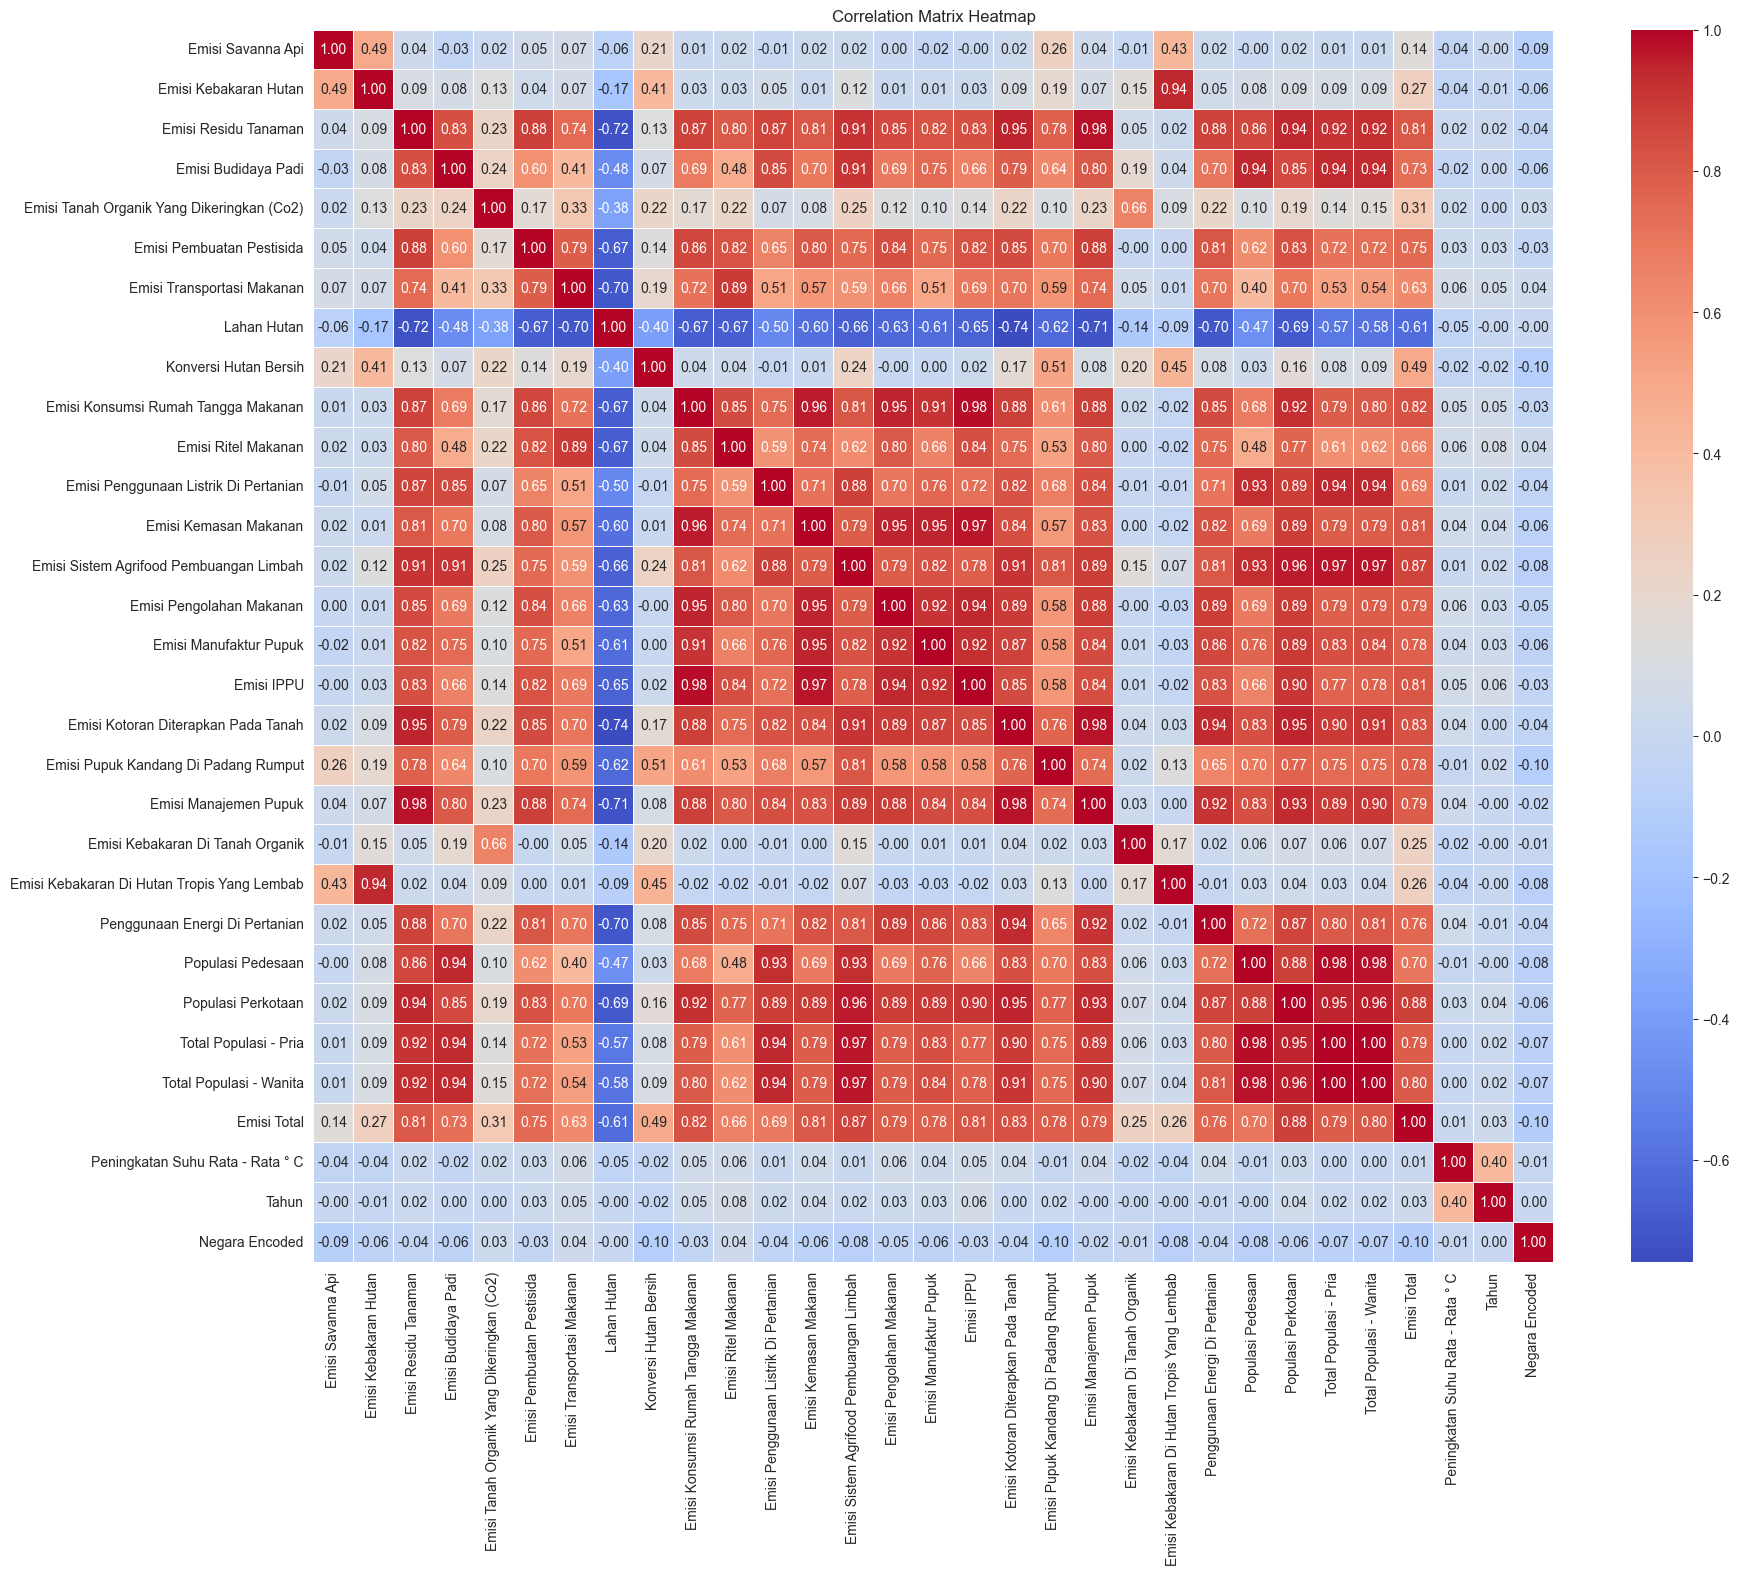

In [238]:
matrix_corr = train_dataset_fill_simpleimputer.corr(method='pearson')
plt.figure(figsize=(20,16))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidth=.5)
plt.title('Correlation Matrix Pearson Heatmap')
plt.show()

### Spearman Correlation

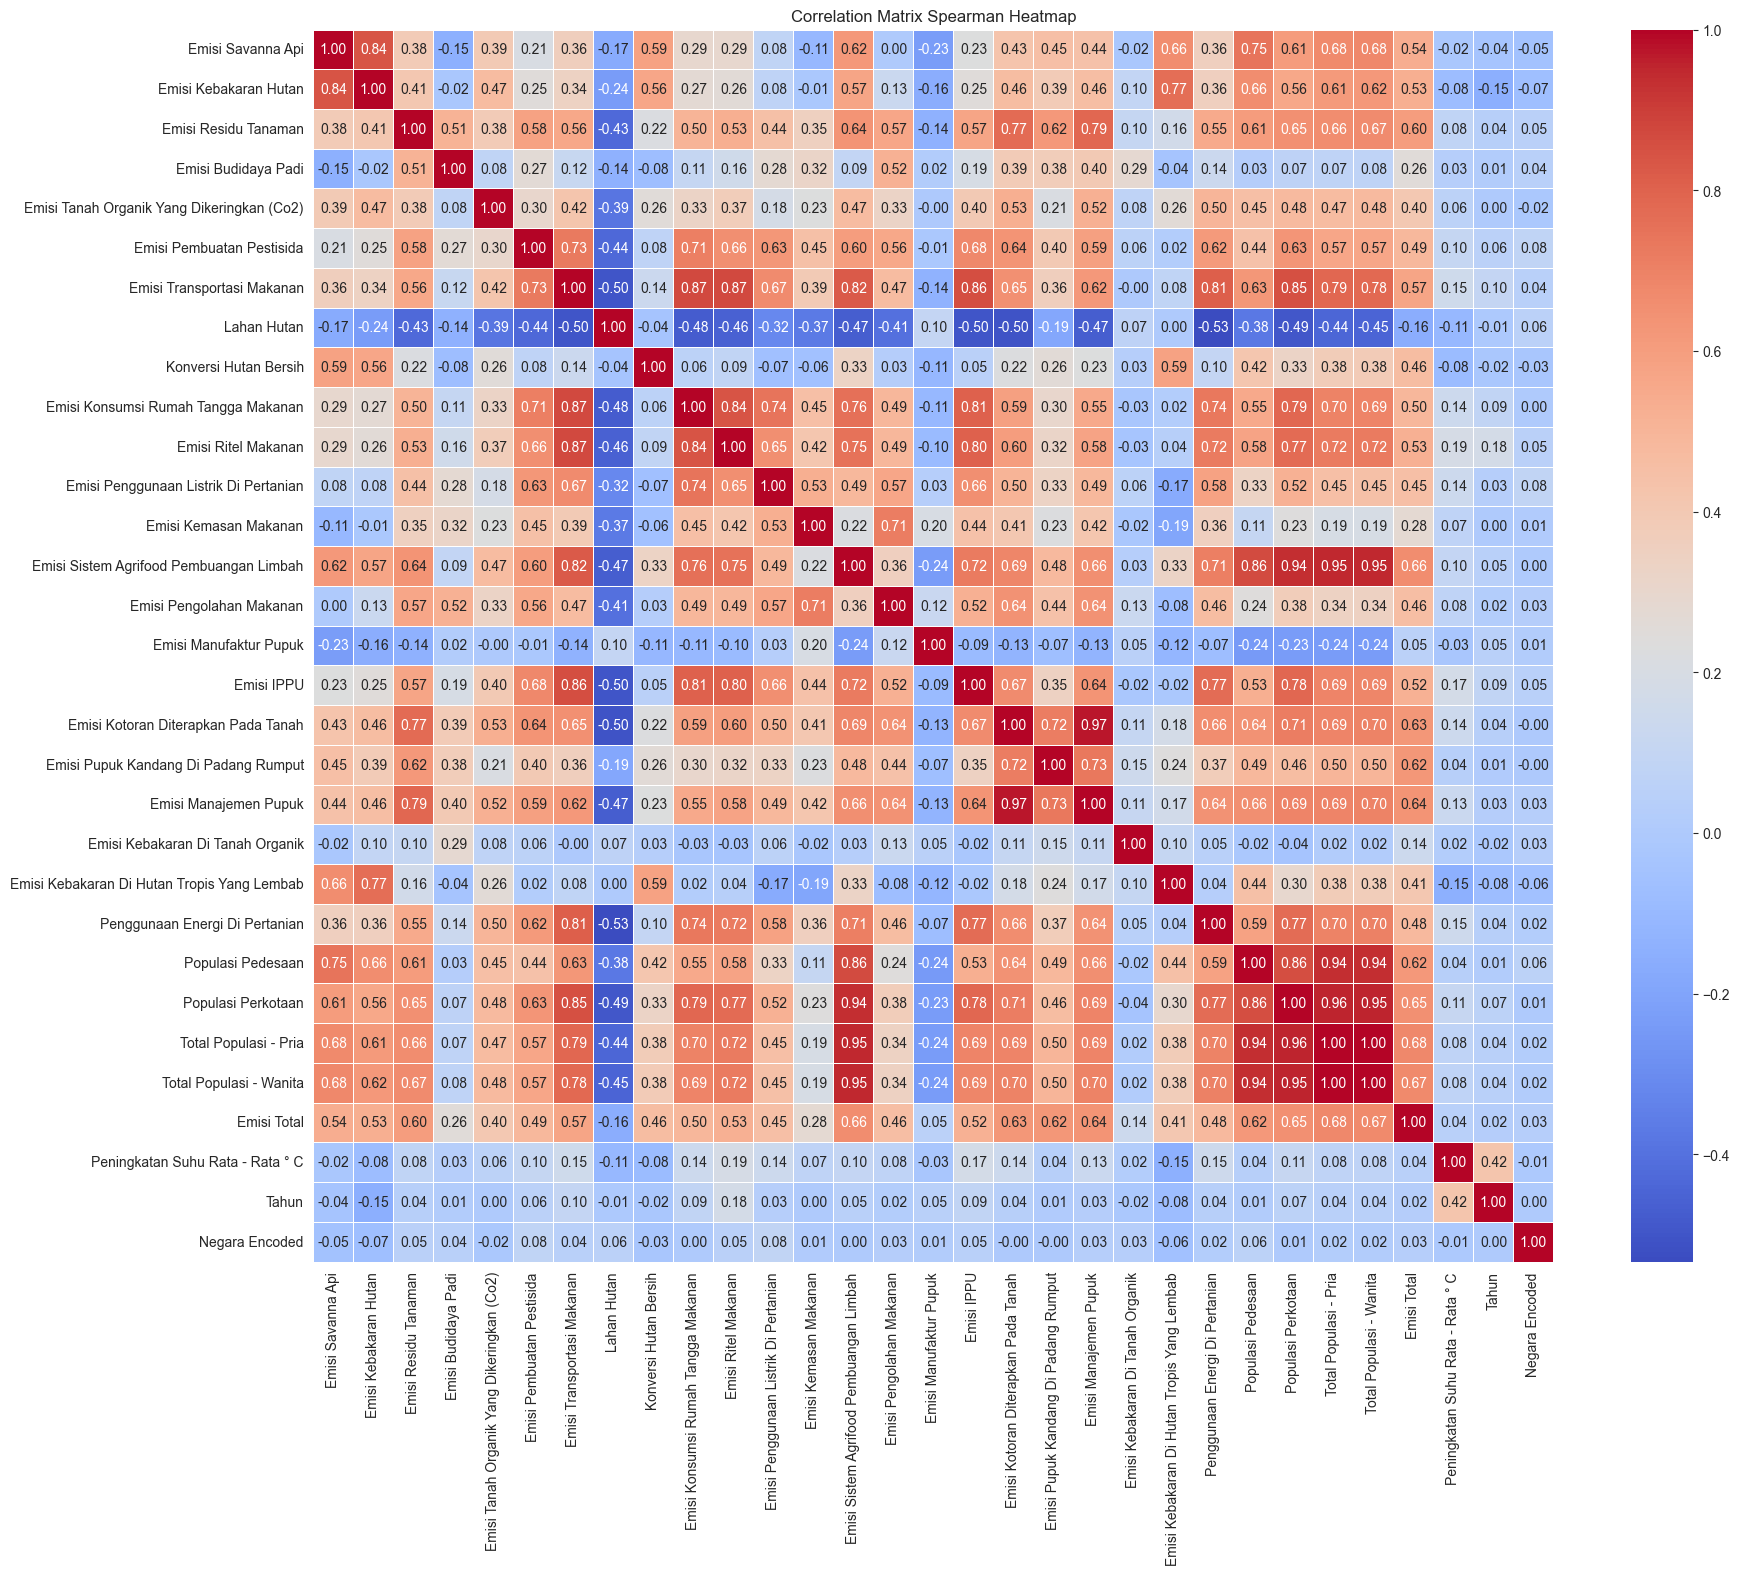

In [239]:
matrix_corr = train_dataset_fill_simpleimputer.corr(method='spearman')
plt.figure(figsize=(20,16))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidth=.5)
plt.title('Correlation Matrix Spearman Heatmap')
plt.show()

### Kendall Correlation

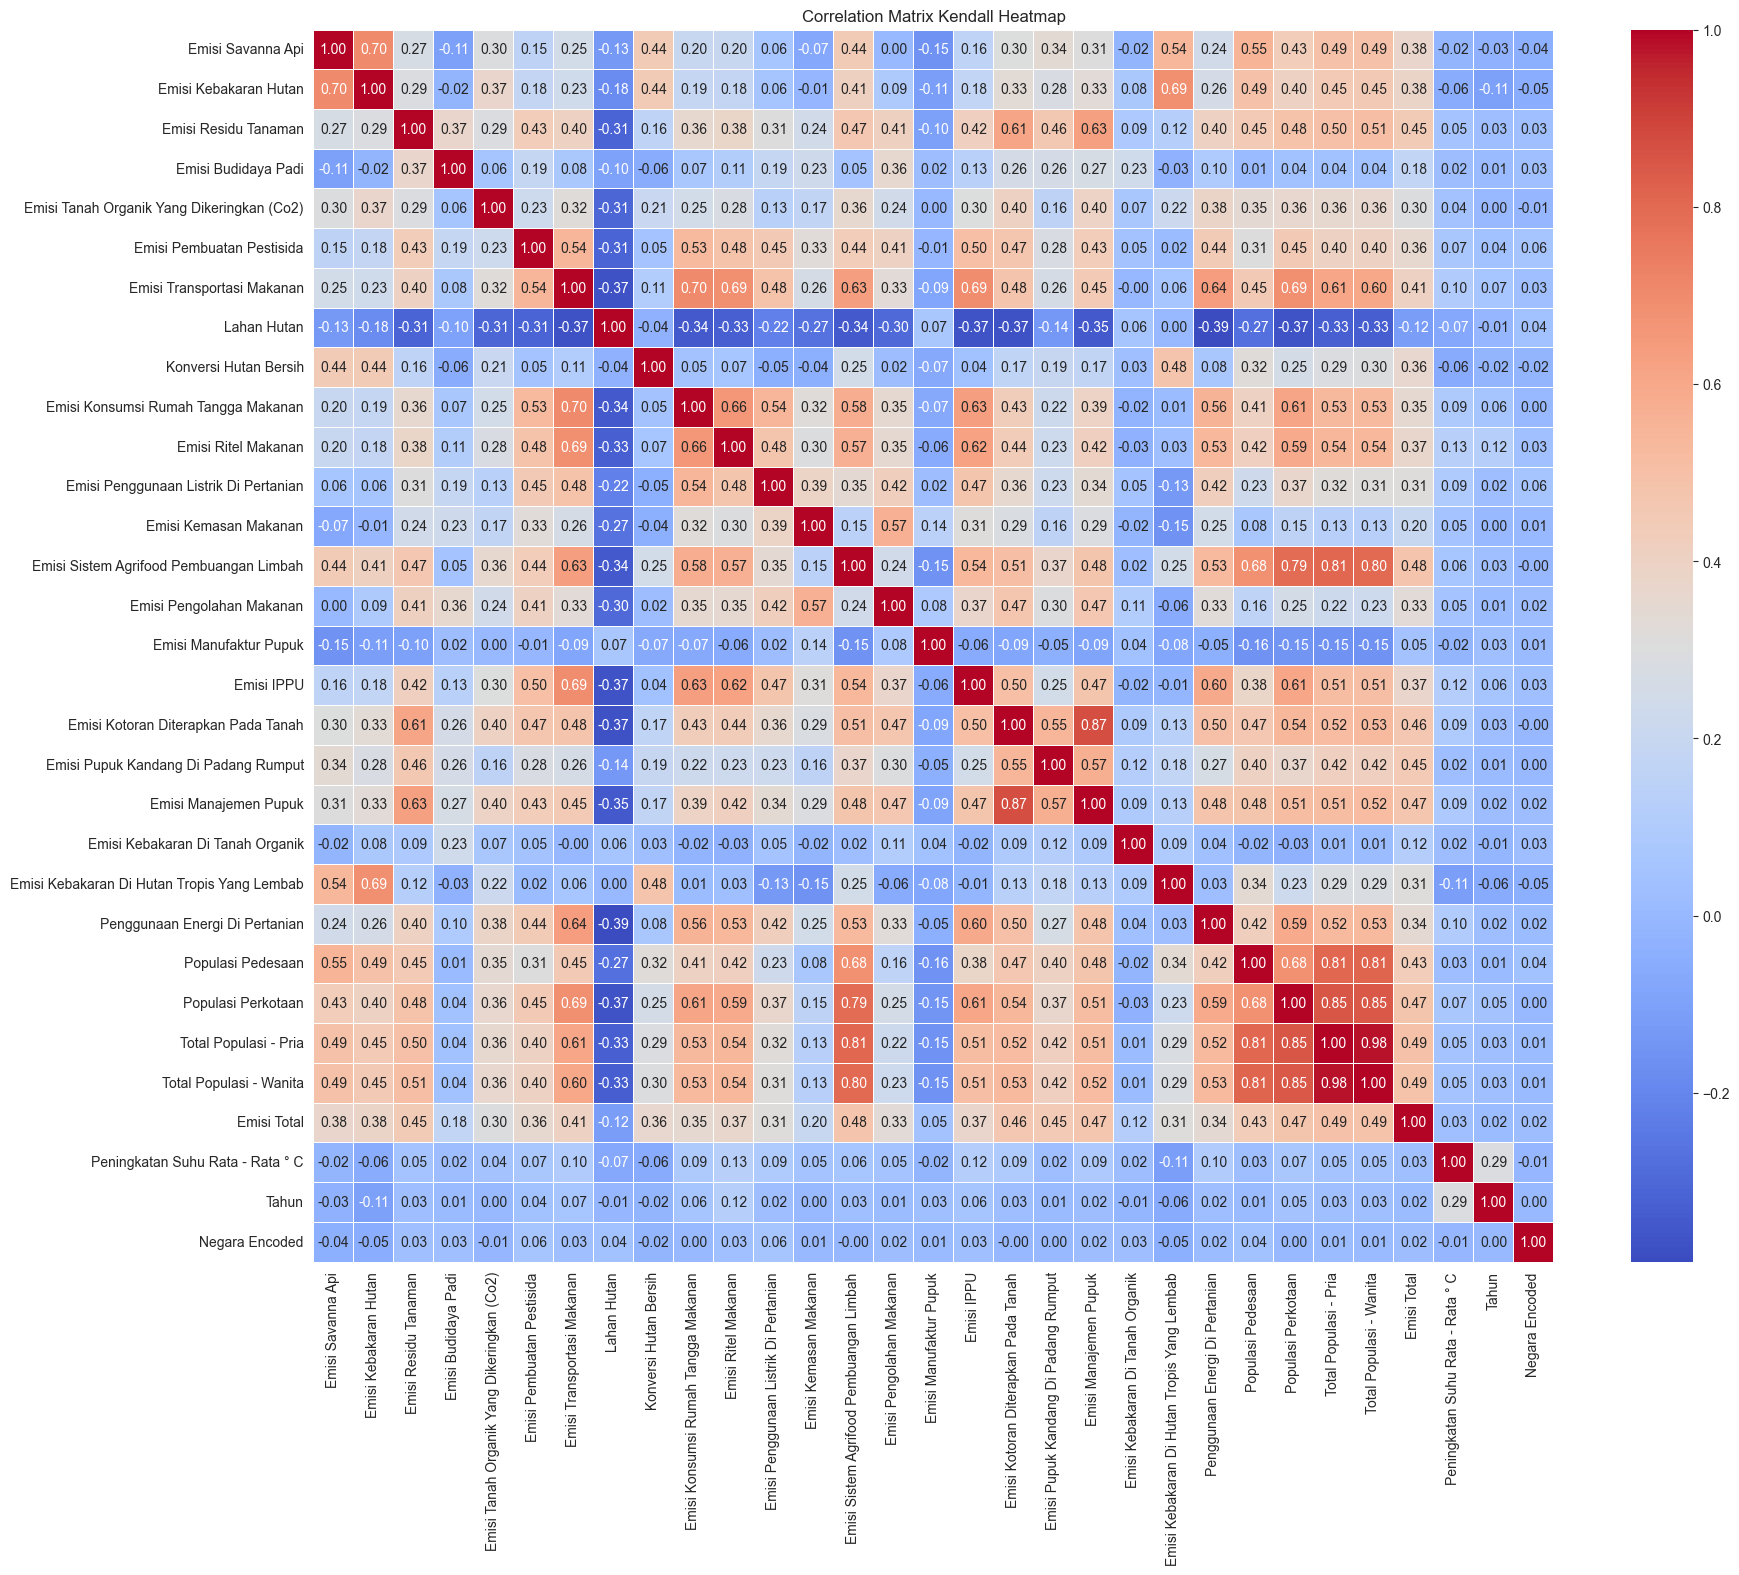

In [240]:
matrix_corr = train_dataset_fill_simpleimputer.corr(method='kendall')
plt.figure(figsize=(20,16))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidth=.5)
plt.title('Correlation Matrix Kendall Heatmap')
plt.show()

### Random Forest Feature Importance

In [242]:
X = train_dataset_fill_simpleimputer.drop('Peningkatan Suhu Rata - Rata ° C', axis=1)
y = train_dataset_fill_simpleimputer['Peningkatan Suhu Rata - Rata ° C']

In [243]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X, y)

RandomForestRegressor(random_state=42)

In [244]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

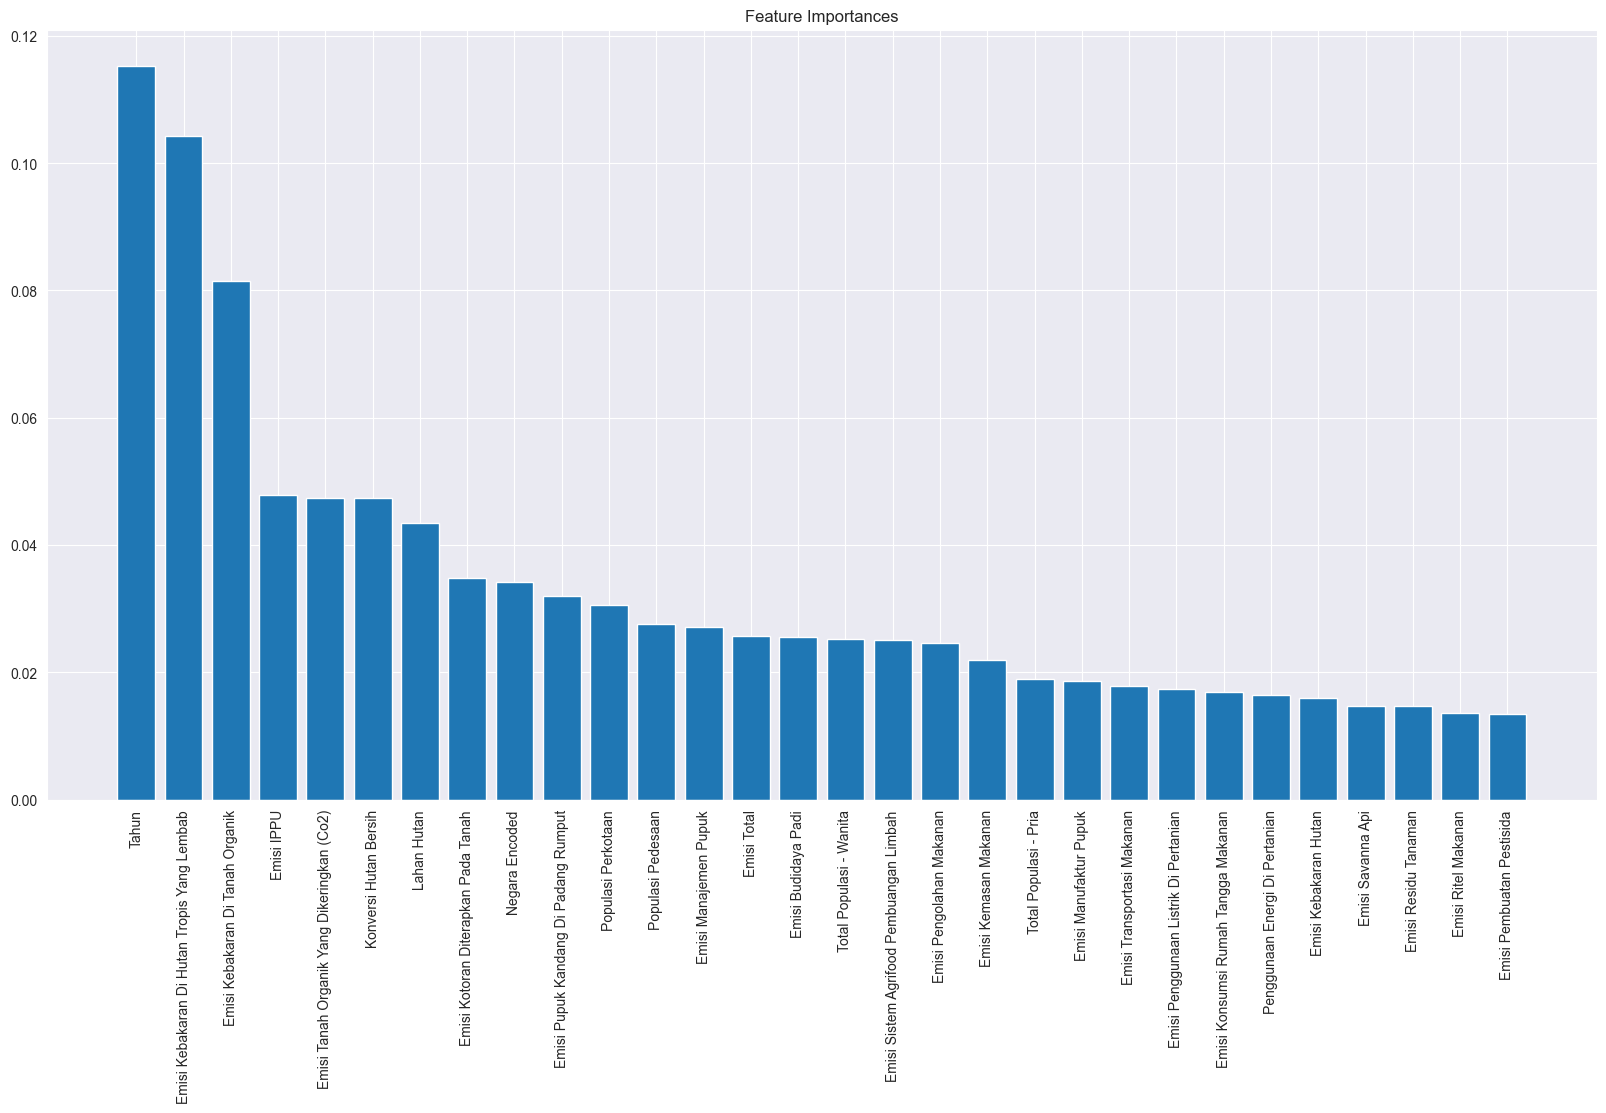

In [252]:
plt.figure(figsize=(20, 10))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

#### With SHAP + RandomForest

In [257]:
import shap

# Menggunakan model Random Forest
explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(X)

# Visualisasi SHAP Summary
shap.summary_plot(shap_values, X)

ImportError: Numba needs NumPy 2.1 or less. Got NumPy 2.2.

### XGBoost Feature Importance

In [246]:
xgbregressor = XGBRegressor(n_estimators=100, random_state=42)
xgbregressor.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [247]:
importances = xgbregressor.feature_importances_
indices = np.argsort(importances)[::-1]

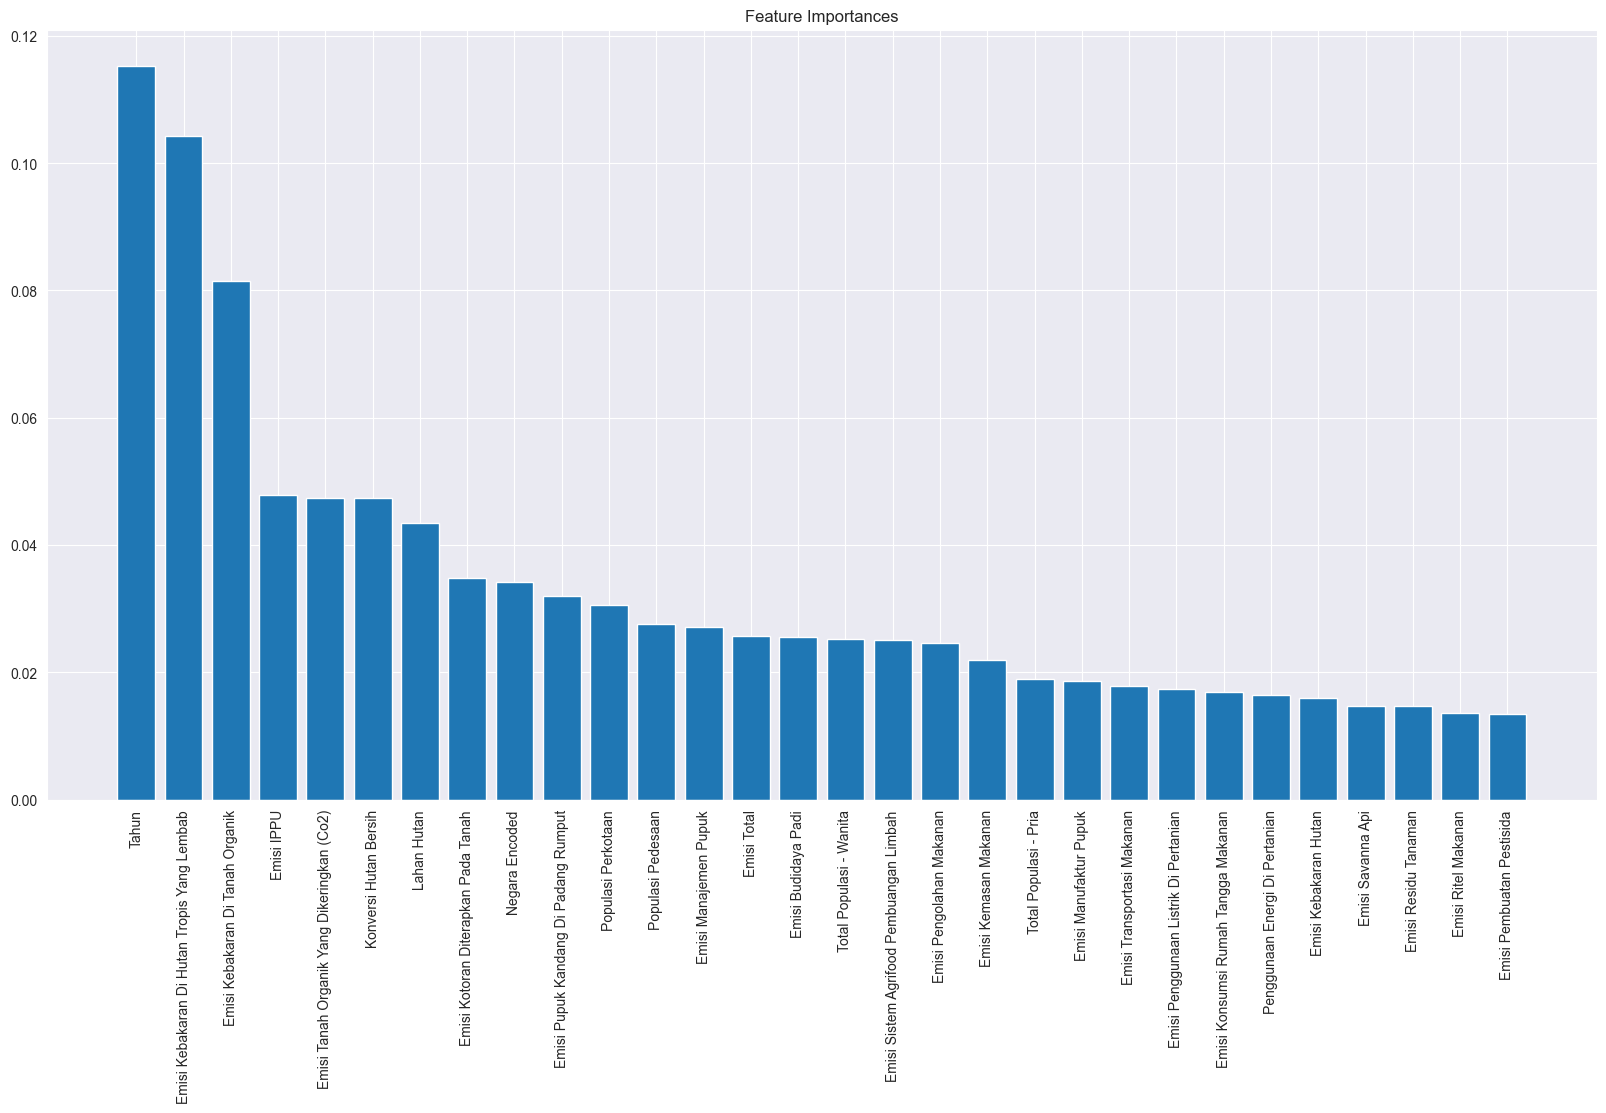

In [248]:
plt.figure(figsize=(20, 10))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

## Distribution Plot All Features

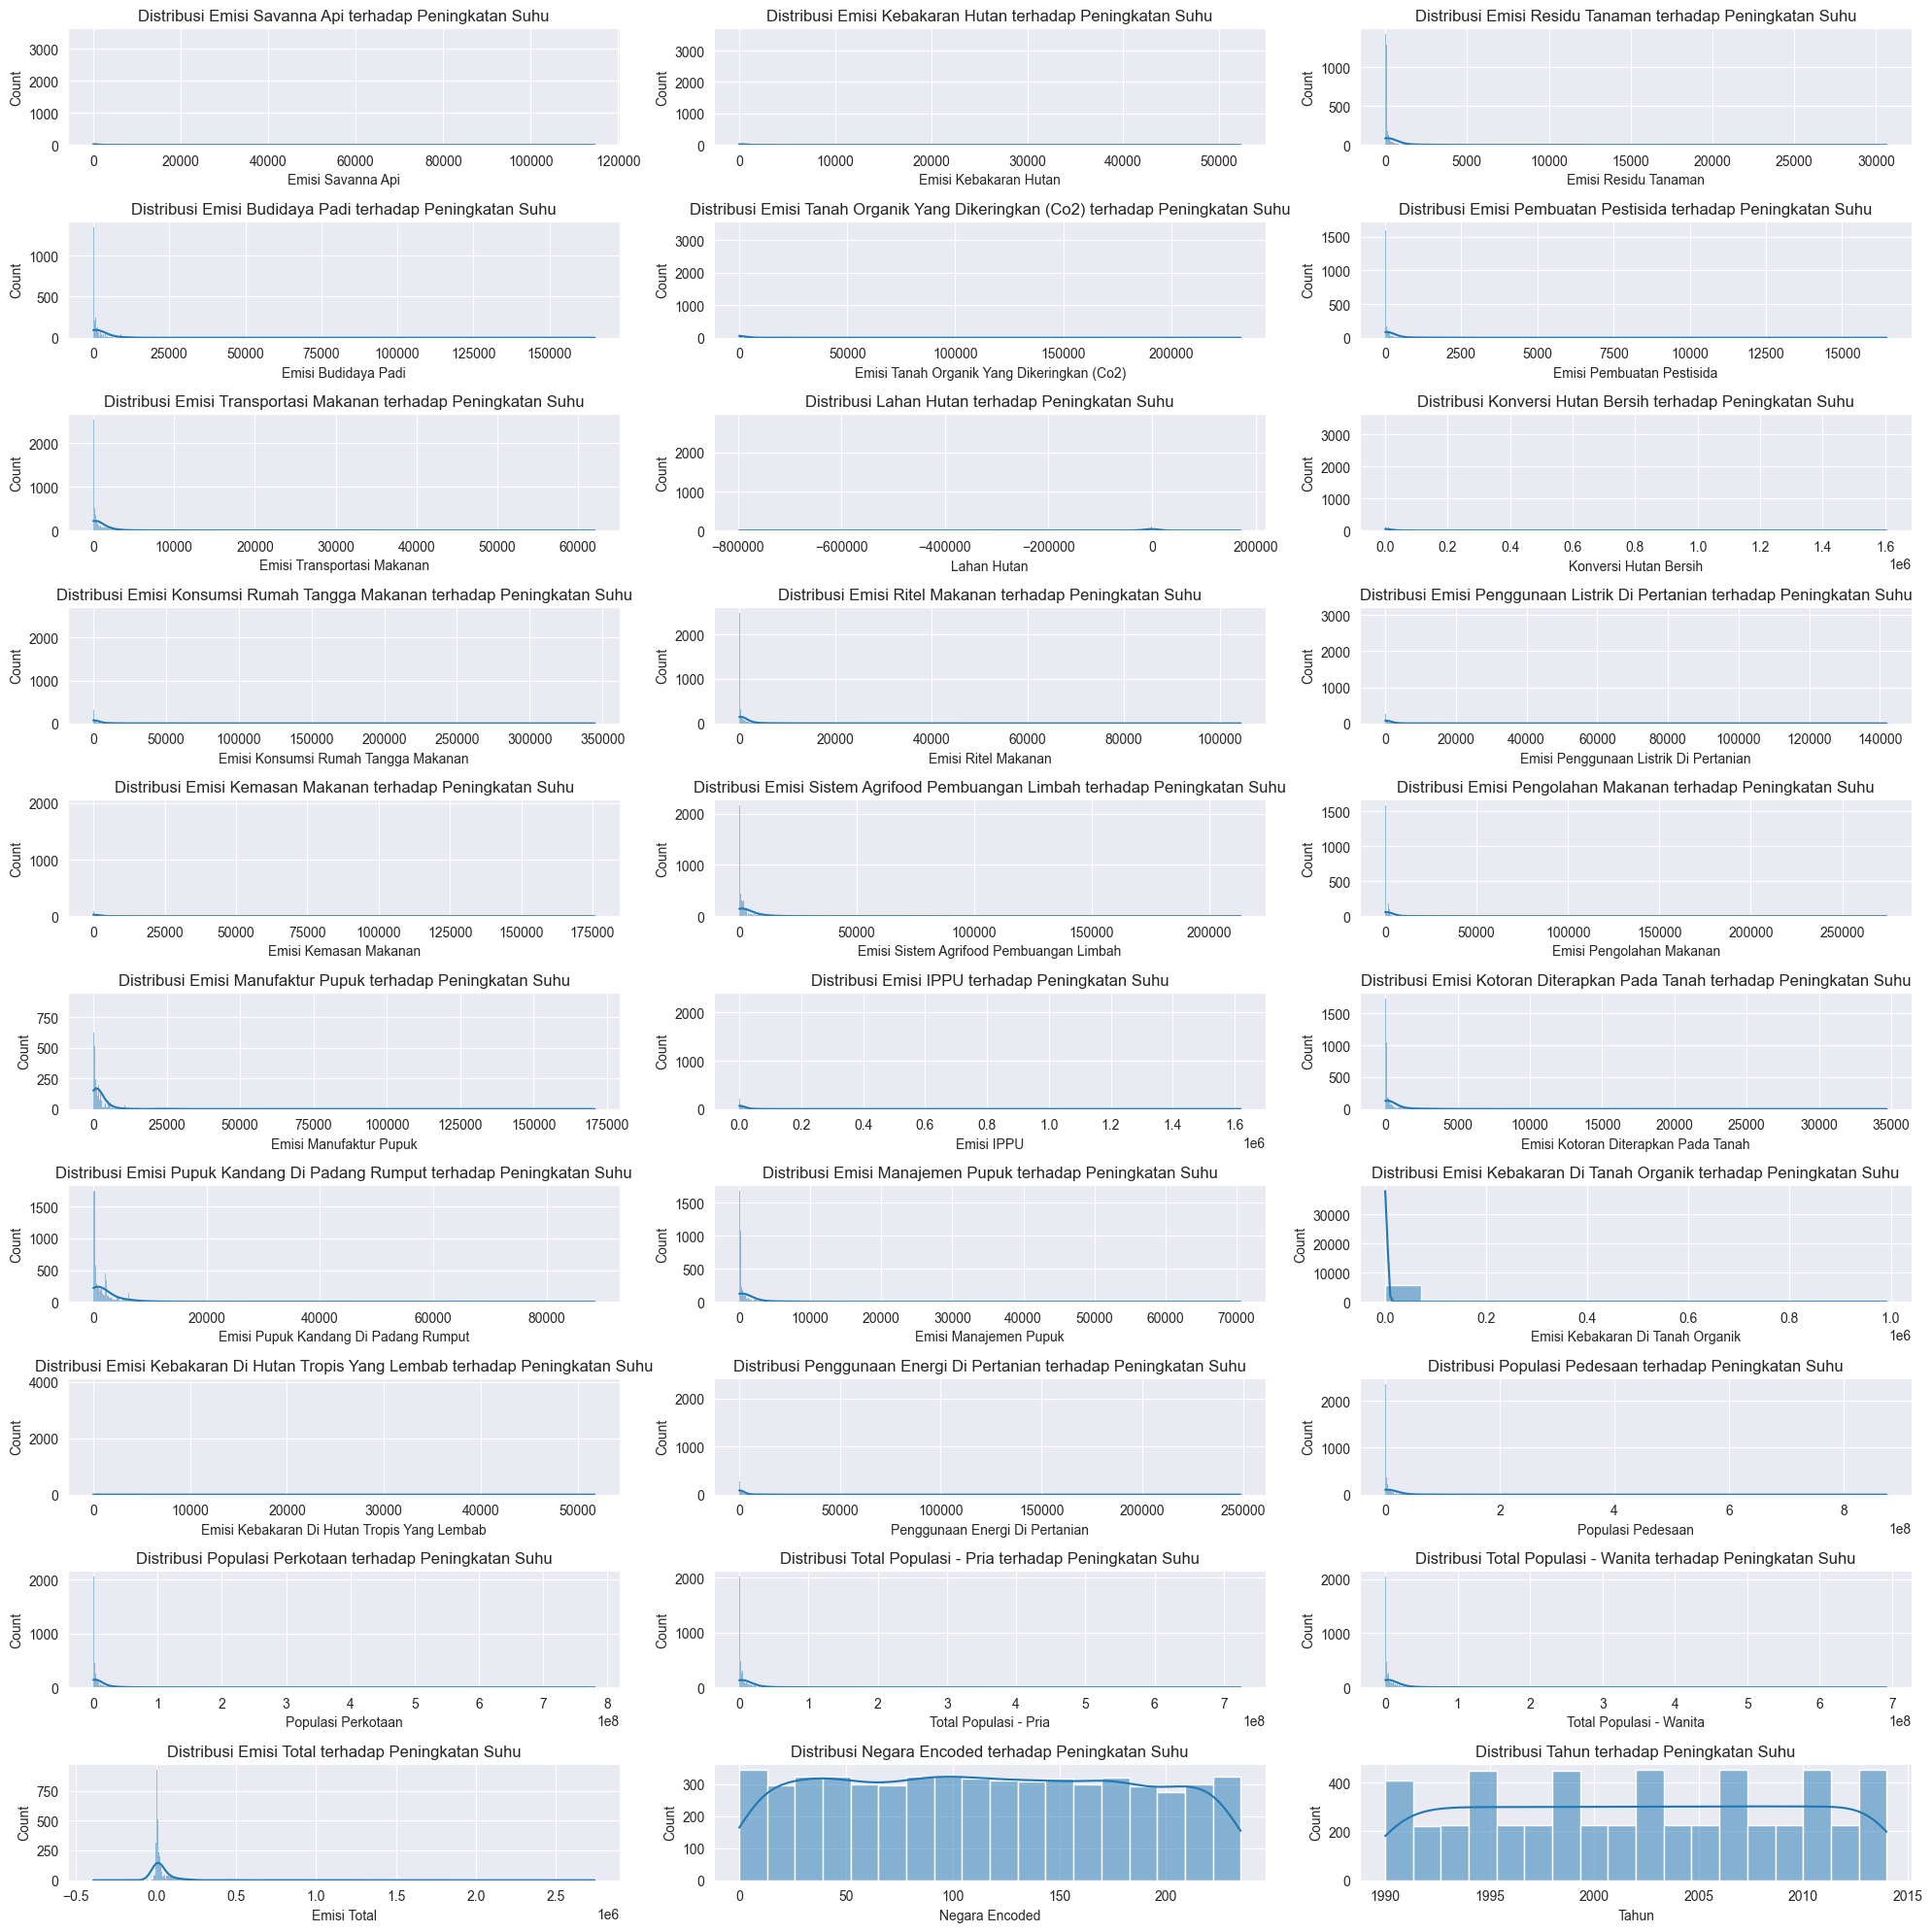

In [122]:
features = ['Emisi Savanna Api',
            'Emisi Kebakaran Hutan', 
            'Emisi Residu Tanaman', 
            'Emisi Budidaya Padi',
            'Emisi Tanah Organik Yang Dikeringkan (Co2)',
            'Emisi Pembuatan Pestisida',
            'Emisi Transportasi Makanan',
            'Lahan Hutan',
            'Konversi Hutan Bersih',
            'Emisi Konsumsi Rumah Tangga Makanan',
            'Emisi Ritel Makanan',
            'Emisi Penggunaan Listrik Di Pertanian', 
            'Emisi Kemasan Makanan',
            'Emisi Sistem Agrifood Pembuangan Limbah', 
            'Emisi Pengolahan Makanan',
            'Emisi Manufaktur Pupuk',
            'Emisi IPPU',
            'Emisi Kotoran Diterapkan Pada Tanah',
            'Emisi Pupuk Kandang Di Padang Rumput', 
            'Emisi Manajemen Pupuk',
            'Emisi Kebakaran Di Tanah Organik',
            'Emisi Kebakaran Di Hutan Tropis Yang Lembab',
            'Penggunaan Energi Di Pertanian', 
            'Populasi Pedesaan',
            'Populasi Perkotaan', 
            'Total Populasi - Pria',
            'Total Populasi - Wanita', 
            'Emisi Total',
            'Negara Encoded',
            'Tahun']

rows = 10
cols = 3

plt.figure(figsize=(20, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=train_dataset_fill_simpleimputer, x=feature, kde=True, palette='muted', multiple='stack')
    plt.title(f'Distribusi {feature} terhadap Peningkatan Suhu')

plt.tight_layout()
plt.show()

## Boxplot All Features

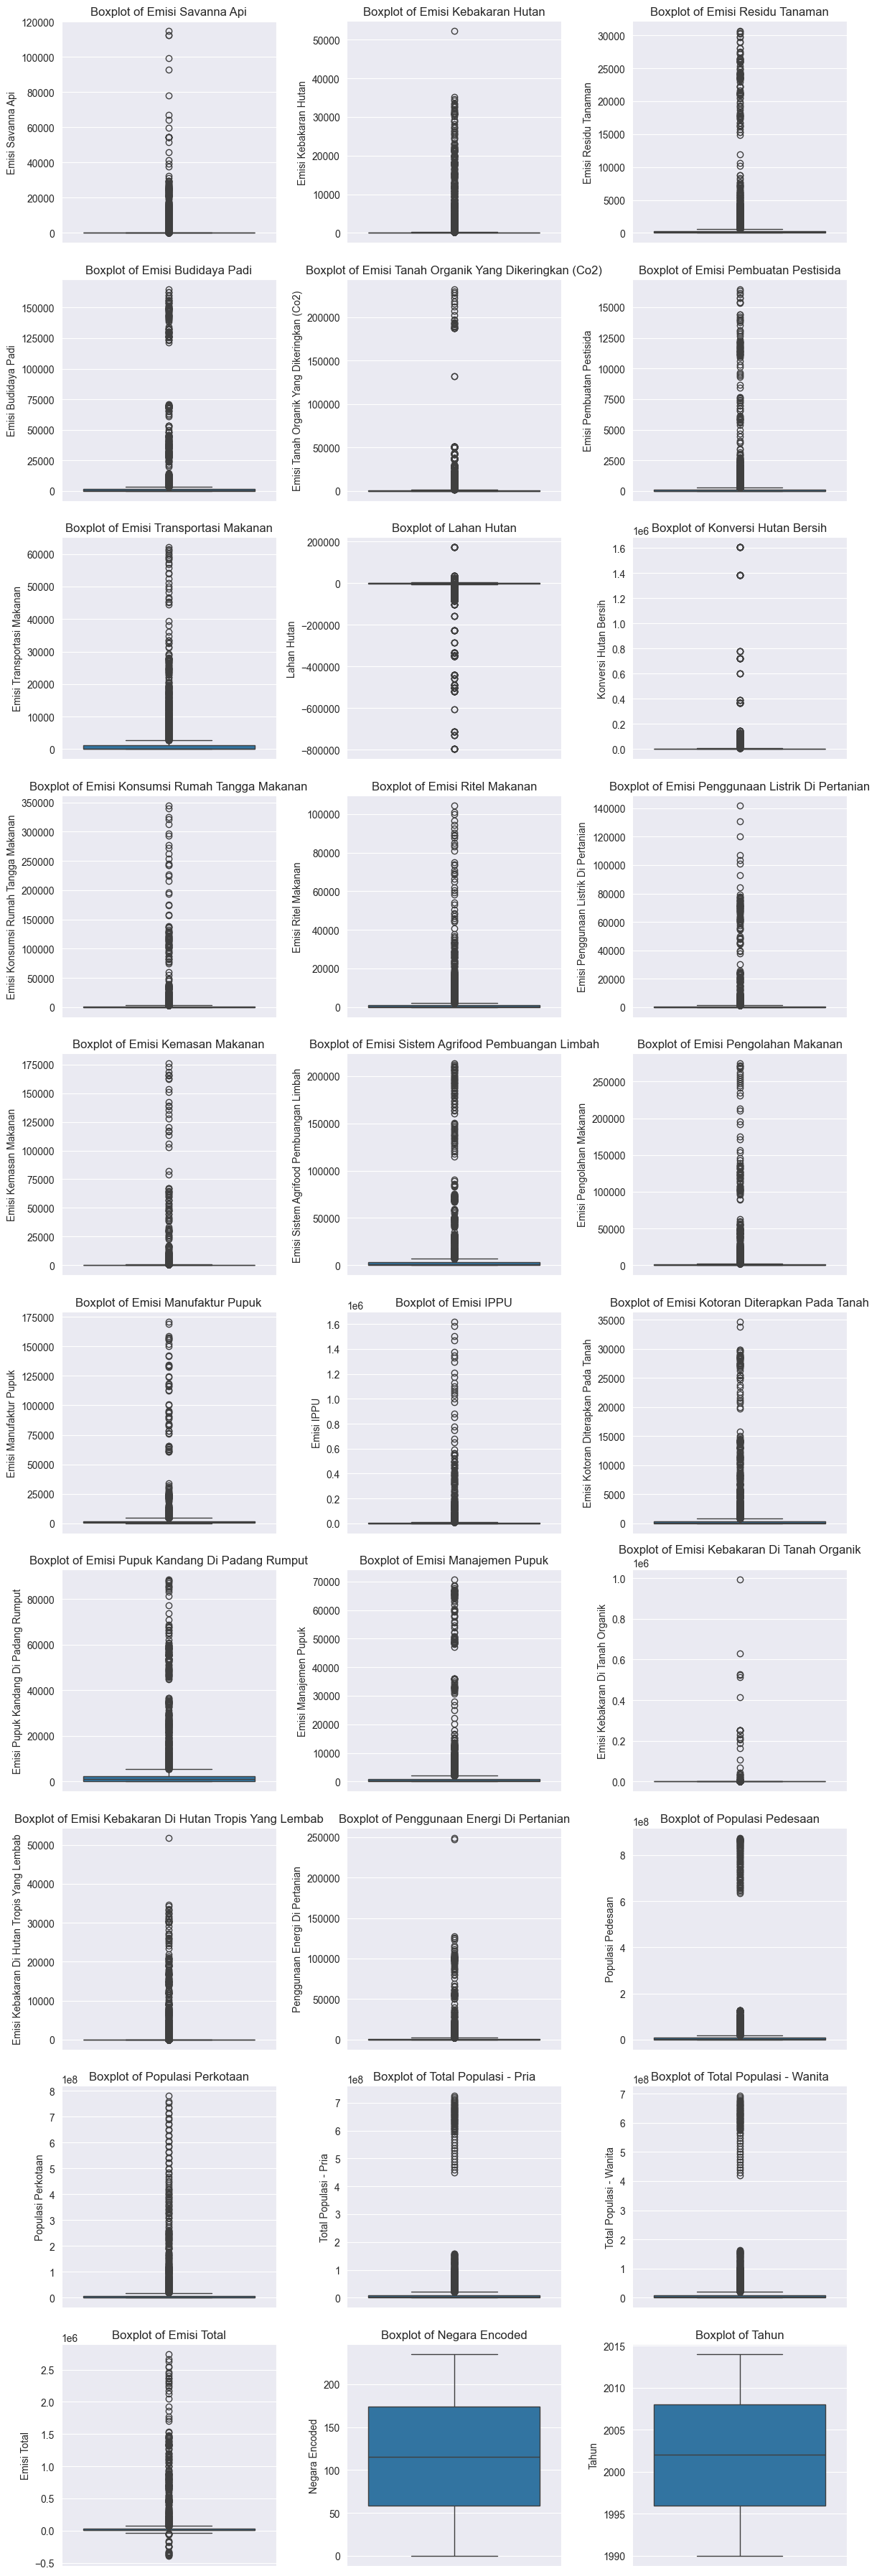

In [123]:
rows = 10
cols = 3

plt.figure(figsize=(12, 36))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=train_dataset_fill_simpleimputer, y=feature)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

## Remove Outliers

In [106]:
train_dataset_fill_simpleimputer.columns

Index(['Emisi Savanna Api', 'Emisi Kebakaran Hutan', 'Emisi Residu Tanaman',
       'Emisi Budidaya Padi', 'Emisi Tanah Organik Yang Dikeringkan (Co2)',
       'Emisi Pembuatan Pestisida', 'Emisi Transportasi Makanan',
       'Lahan Hutan', 'Konversi Hutan Bersih',
       'Emisi Konsumsi Rumah Tangga Makanan', 'Emisi Ritel Makanan',
       'Emisi Penggunaan Listrik Di Pertanian', 'Emisi Kemasan Makanan',
       'Emisi Sistem Agrifood Pembuangan Limbah', 'Emisi Pengolahan Makanan',
       'Emisi Manufaktur Pupuk', 'Emisi IPPU',
       'Emisi Kotoran Diterapkan Pada Tanah',
       'Emisi Pupuk Kandang Di Padang Rumput', 'Emisi Manajemen Pupuk',
       'Emisi Kebakaran Di Tanah Organik',
       'Emisi Kebakaran Di Hutan Tropis Yang Lembab',
       'Penggunaan Energi Di Pertanian', 'Populasi Pedesaan',
       'Populasi Perkotaan', 'Total Populasi - Pria',
       'Total Populasi - Wanita', 'Emisi Total',
       'Peningkatan Suhu Rata - Rata ° C', 'Tahun', 'Negara Encoded'],
      dtype='obj

### Remove Outliers Rest of Features

In [224]:
def check_outliers(feature: str):# Calculate Q1 (25th percentile) and Q3 (75th percentile)
    # Q1 = train_dataset_fill_simpleimputer[feature].quantile(0.25)
    # Q3 = train_dataset_fill_simpleimputer[feature].quantile(0.75)
    
    # Trying to experiment with extrem quantile 
    Q1 = train_dataset_fill_simpleimputer[feature].quantile(0.01)
    Q3 = train_dataset_fill_simpleimputer[feature].quantile(0.99)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bound to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = train_dataset_fill_simpleimputer[(train_dataset_fill_simpleimputer[feature] < lower_bound) | (train_dataset_fill_simpleimputer[feature] > upper_bound)]
    
    print(f"Outliers {feature} : {len(outliers)}")
    # if len(outliers) > 150:
    # train_dataset_fill_simpleimputer.drop(train_dataset_fill_simpleimputer[(train_dataset_fill_simpleimputer[feature] < lower_bound) | (train_dataset_fill_simpleimputer[feature] > upper_bound)].index, inplace=True)
    # if train_dataset_fill_simpleimputer[feature].min() <= 0:
        # Clean outliers with log1p transformation
    print(f"Cleaning outliers {feature} with log1p transformation")
    remove_outliers_with_log1p(feature)
    # elif train_dataset_fill_simpleimputer[feature].min() > 0:
    #     print(f"Cleaning outliers {feature} with boxcox transformation")
    #     # Clean outliers with boxcox transformation
    #     remove_outliers_with_boxcox(feature)

def remove_outliers_with_log1p(feature: str):
    # 2. Winsorizing (Capping nilai ekstrem pada persentil 1% dan 99%)
    data_winsorized = np.clip(train_dataset_fill_simpleimputer[feature],
                                train_dataset_fill_simpleimputer[feature].quantile(0.01),
                                train_dataset_fill_simpleimputer[feature].quantile(0.99))
    
    # 3. Transformasi Log1p
    data_transformed = np.log1p(data_winsorized)
    
    train_dataset_fill_simpleimputer[feature] = data_transformed

def remove_outliers_with_boxcox(feature: str):
    # 2. Winsorizing (Capping nilai ekstrem pada persentil 1% dan 99%)
    winsorized = np.clip(train_dataset_fill_simpleimputer[feature],
                                train_dataset_fill_simpleimputer[feature].quantile(0.01),
                                train_dataset_fill_simpleimputer[feature].quantile(0.99))
    
    # 3. Transformasi Box-Cox
    data_transformed, _ = stats.boxcox(winsorized)
    
    train_dataset_fill_simpleimputer[feature] = data_transformed

### Launch Outliers Detection

In [236]:
for feature in features:
    check_outliers(feature)

Outliers Emisi Savanna Api : 8
Cleaning outliers Emisi Savanna Api with log1p transformation
Outliers Emisi Kebakaran Hutan : 0
Cleaning outliers Emisi Kebakaran Hutan with log1p transformation
Outliers Emisi Residu Tanaman : 0
Cleaning outliers Emisi Residu Tanaman with log1p transformation
Outliers Emisi Budidaya Padi : 0
Cleaning outliers Emisi Budidaya Padi with log1p transformation
Outliers Emisi Tanah Organik Yang Dikeringkan (Co2) : 27
Cleaning outliers Emisi Tanah Organik Yang Dikeringkan (Co2) with log1p transformation
Outliers Emisi Pembuatan Pestisida : 0
Cleaning outliers Emisi Pembuatan Pestisida with log1p transformation
Outliers Emisi Transportasi Makanan : 0
Cleaning outliers Emisi Transportasi Makanan with log1p transformation
Outliers Lahan Hutan : 0
Cleaning outliers Lahan Hutan with log1p transformation
Outliers Konversi Hutan Bersih : 21
Cleaning outliers Konversi Hutan Bersih with log1p transformation
Outliers Emisi Konsumsi Rumah Tangga Makanan : 10
Cleaning outl

### Check Outliers

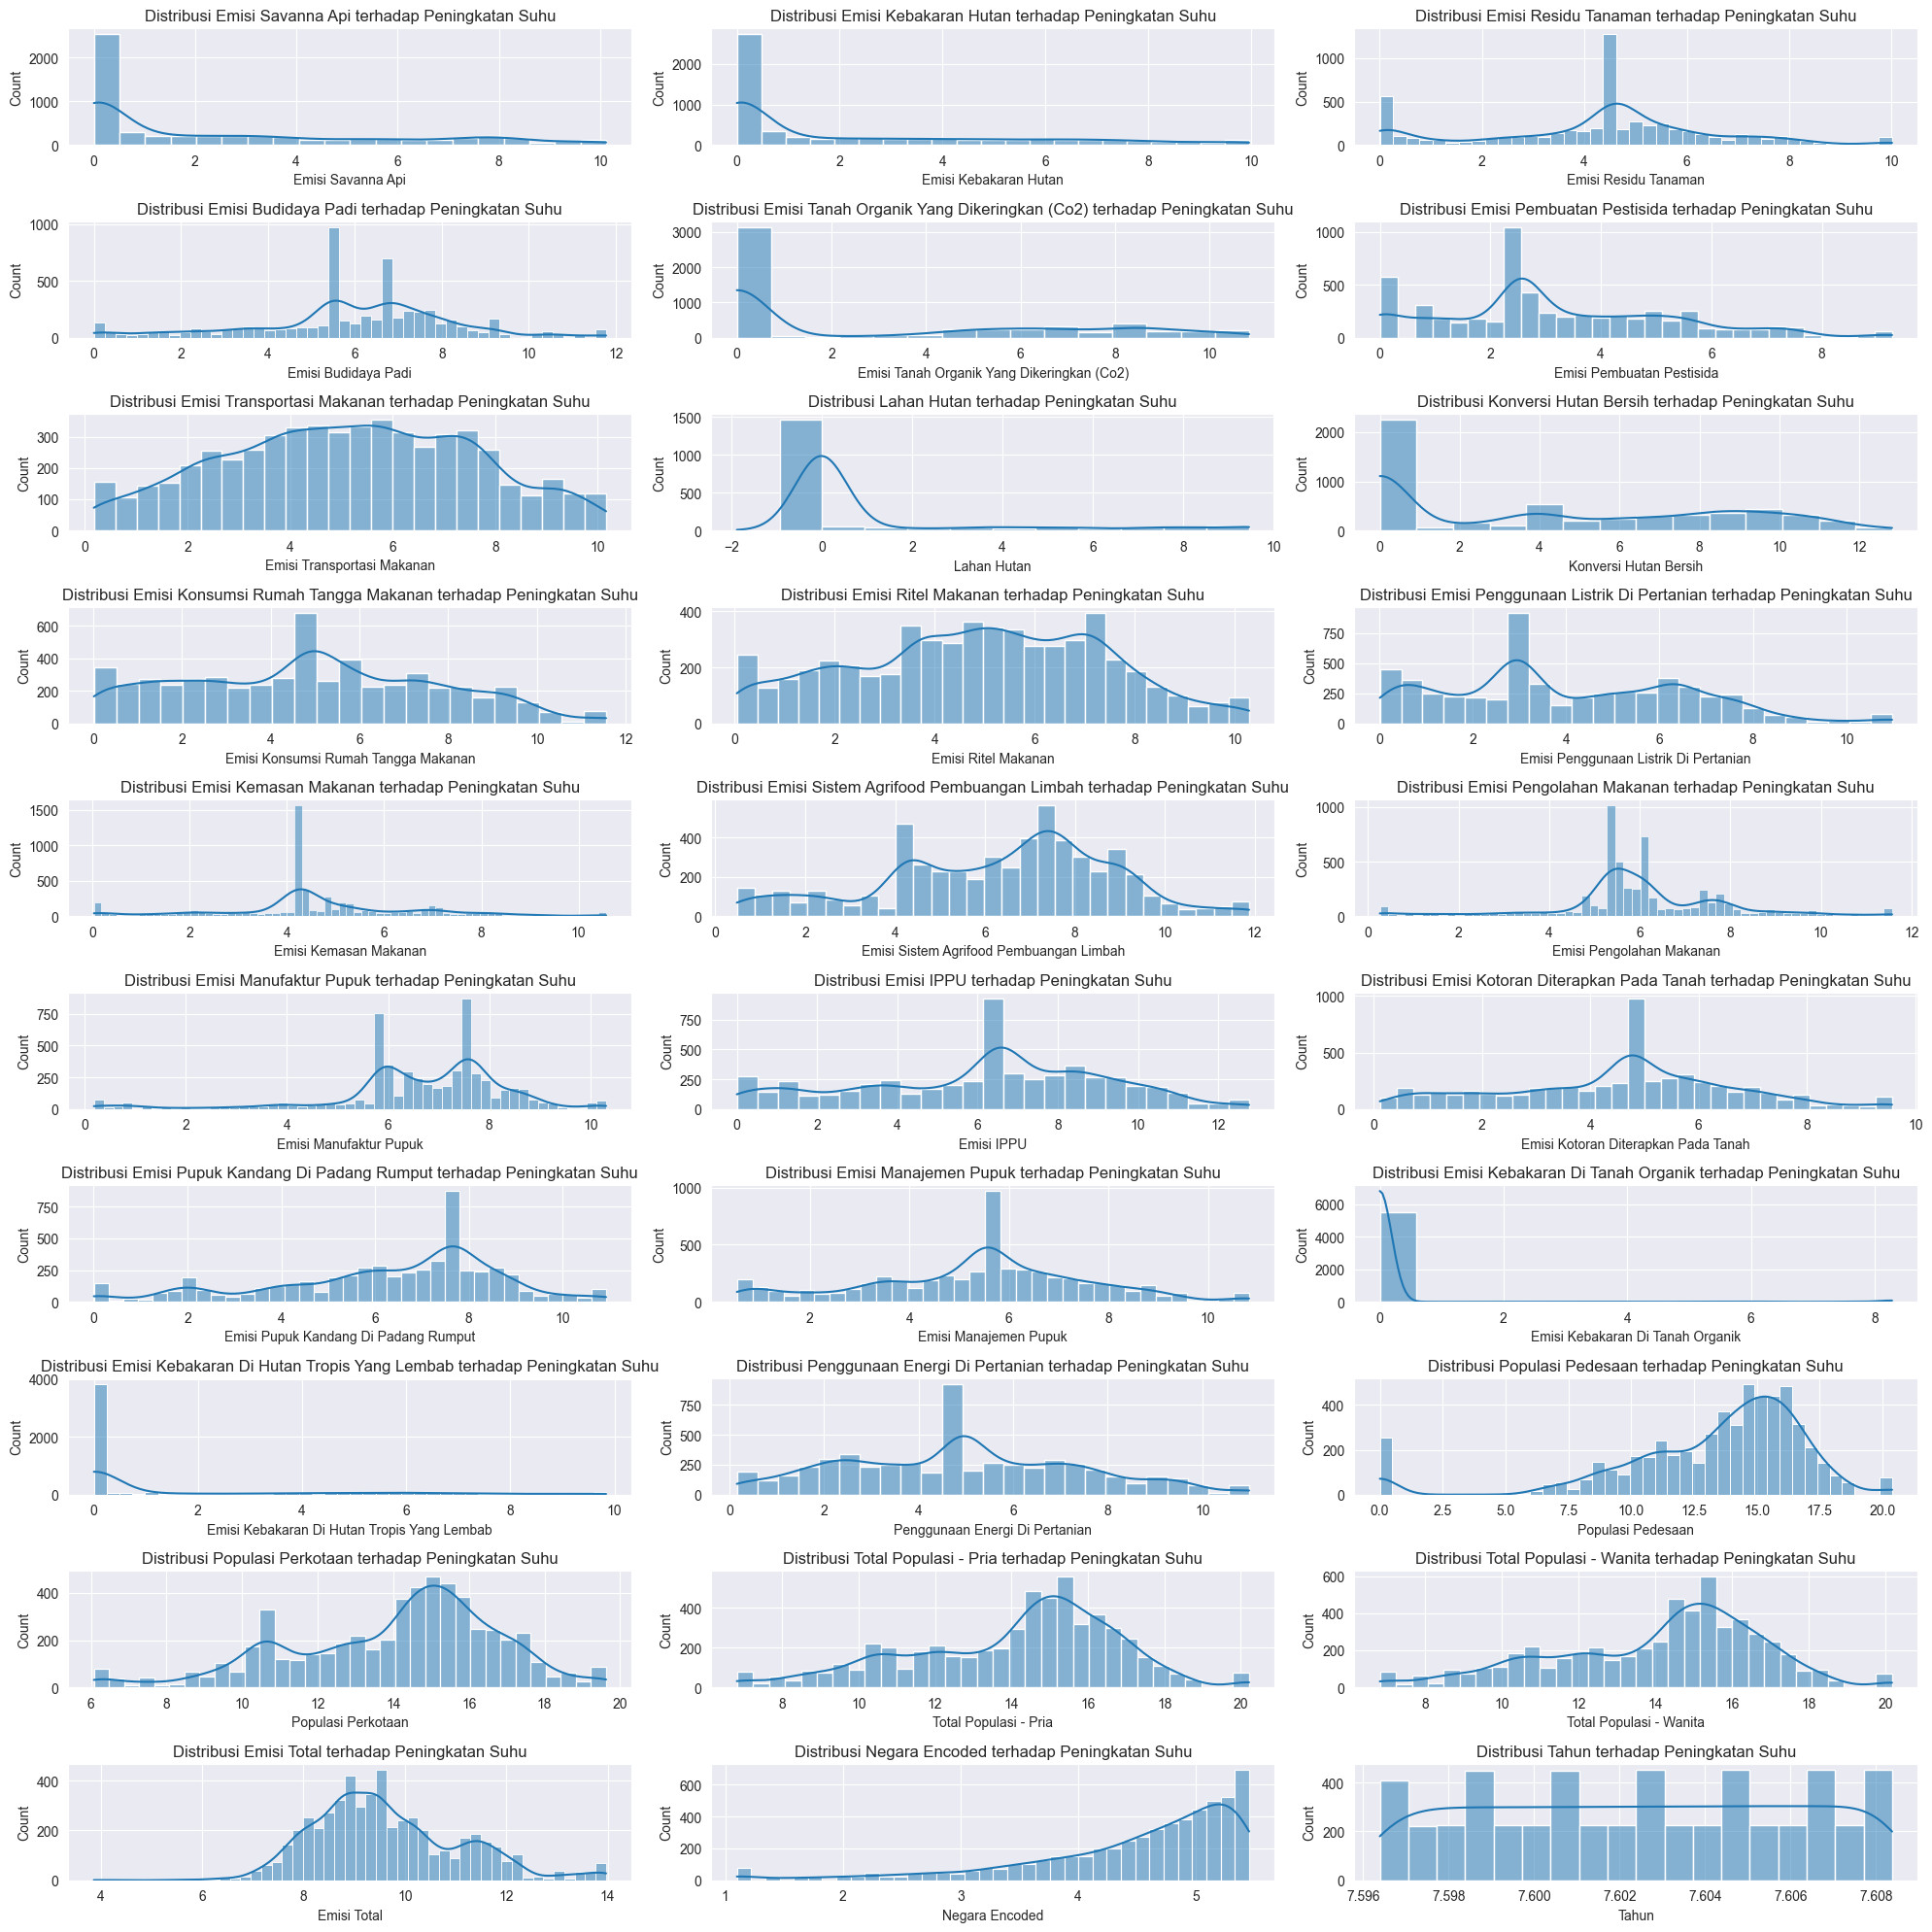

In [226]:
plt.figure(figsize=(20, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data=train_dataset_fill_simpleimputer, x=feature, kde=True, palette='muted', multiple='stack')
    plt.title(f'Distribusi {feature} terhadap Peningkatan Suhu')

plt.tight_layout()
plt.show()

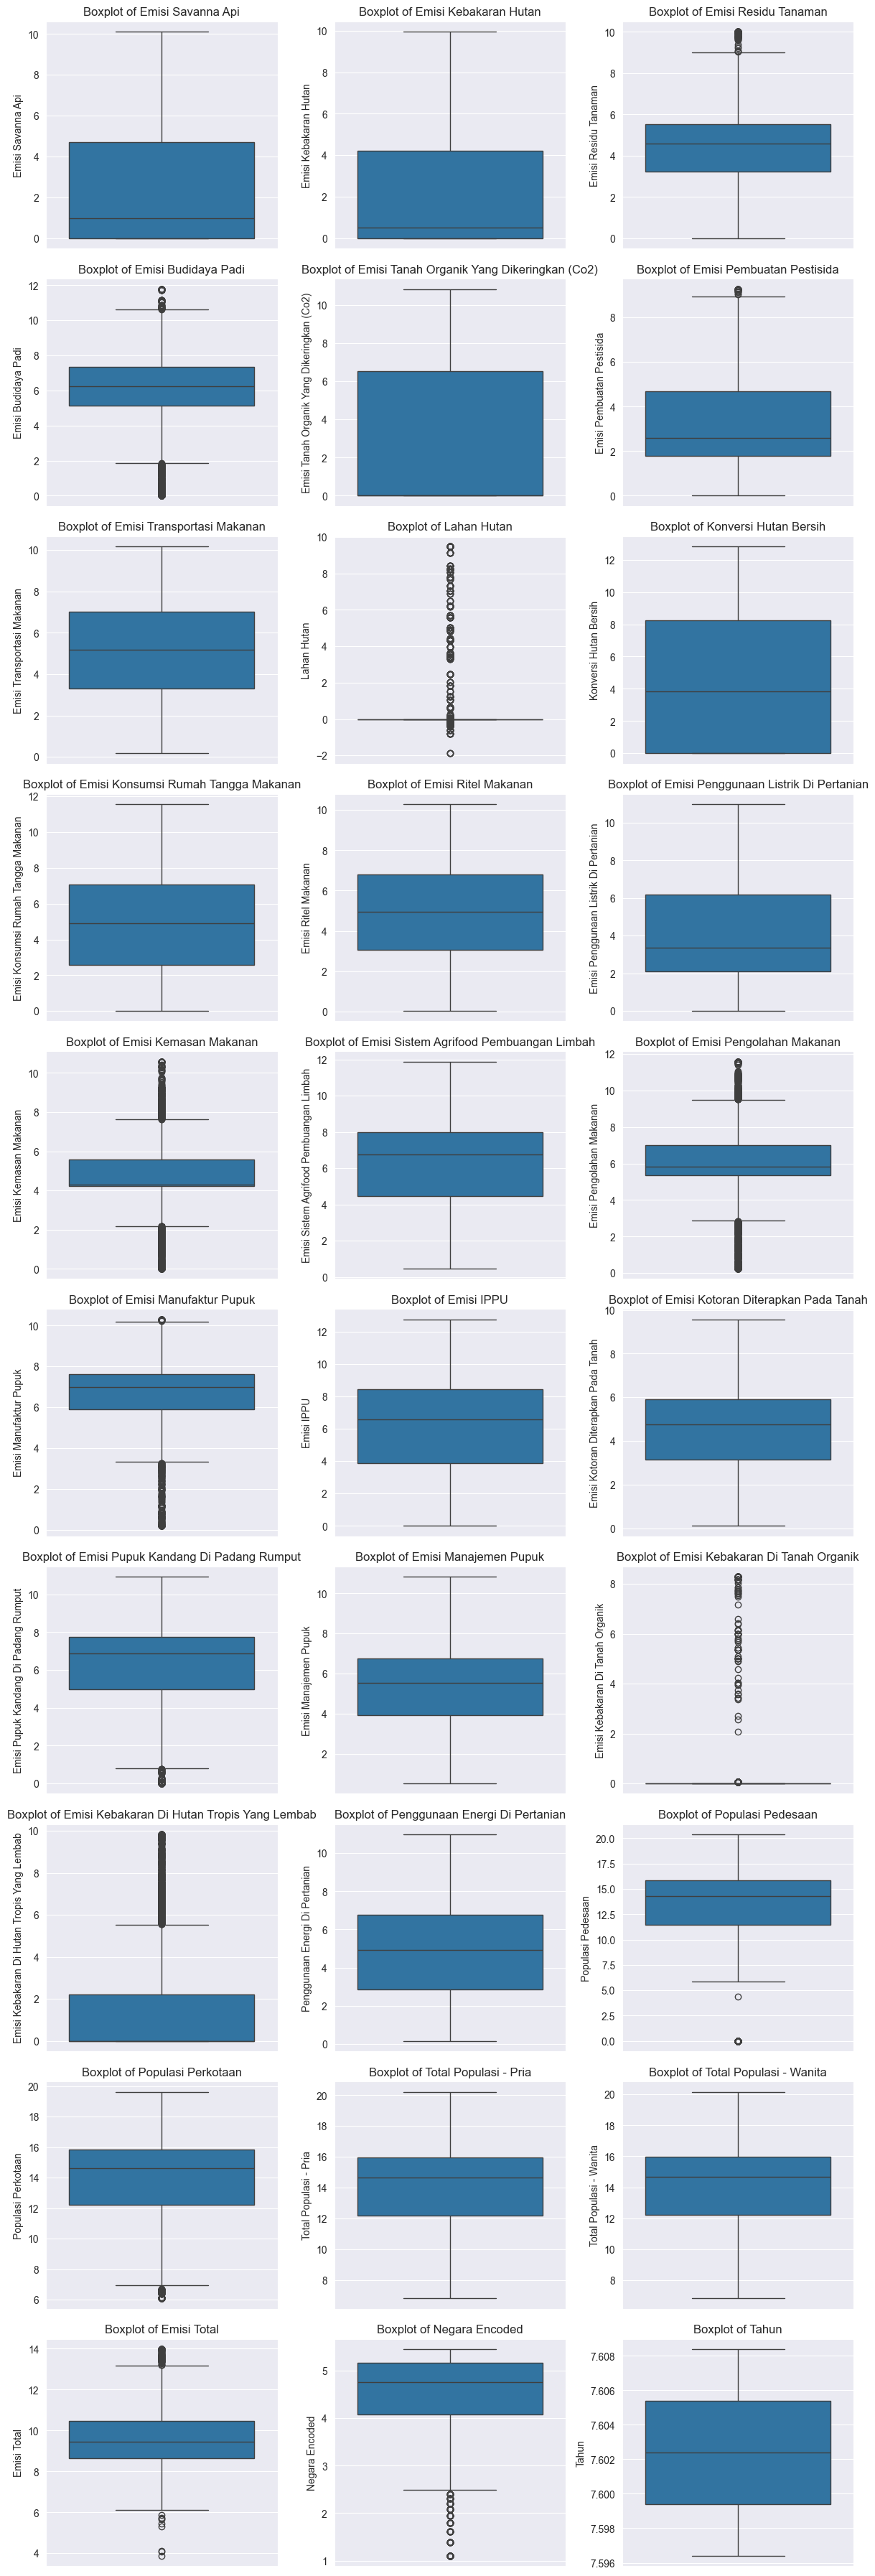

In [227]:
plt.figure(figsize=(12, 36))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=train_dataset_fill_simpleimputer, y=feature)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

# Processing Data

In [215]:
df_data = train_dataset_fill_simpleimputer.drop('Peningkatan Suhu Rata - Rata ° C', axis=1)
df_target = train_dataset_fill_simpleimputer['Peningkatan Suhu Rata - Rata ° C']

In [216]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=.2, random_state=50)

In [217]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('quantile_transform', QuantileTransformer(output_distribution='normal')),
    ('scaler', StandardScaler())
])

In [218]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [219]:
models = {
    "Linear": LinearRegression(),
    "Lasso": Lasso(alpha=0.01),
    "Ridge": Ridge(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='linear'),
    "XGBoost": XGBRegressor(
	    objective ='reg:squarederror',
	    colsample_bytree = 0.3,
	    learning_rate = 0.1, 
	    max_depth = 5,
	    alpha = 10,
	    n_estimators = 10,
	    seed=42),
    "LightGBM": LGBMRegressor(seed=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    results.append([name, f"{mape * 100:.2f}%"])

# Membuat DataFrame untuk hasil evaluasi
results_df = pd.DataFrame(results, columns=['Model', 'MAPE'])

# Cetak hasil evaluasi dalam bentuk tabel
results_df

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6869
[LightGBM] [Info] Number of data points in the train set: 4482, number of used features: 29
[LightGBM] [Info] Start training from score 0.751442


Model     MAPE
0        Linear  159.61%
1         Lasso  158.90%
2         Ridge  159.61%
3    ElasticNet  162.61%
4  RandomForest  107.49%
5           SVR  163.46%
6       XGBoost  159.36%
7      LightGBM  101.99%